In [2]:
# Rutas
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# Modelo inicial

## Análisis inicial

In [3]:
# Cargar los datasets
test = pd.read_parquet(test_data_path)
train = pd.read_parquet(train_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# Verificar las primeras filas de cada dataset cargado
print(test.info())
print(train.info())
print(products.info())
print(users.info())

print(test.head())
print(train.head())
print(products.head())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  int8          
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  int8          
 7   pagetype         29275 non-null  int8          
dtypes: datetime64[ns](2), int32(3), int8(3)
memory usage: 886.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datet

## Exploración básica.

In [4]:
# Funciones de análisis de los dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

def analyze_add_to_cart_distribution(train):
    """Distribución de la variable add_to_cart en el dataset de entrenamiento."""
    plt.figure(figsize=(6, 4))
    sns.countplot(x='add_to_cart', data=train, palette='pastel')
    plt.title("Distribución de Add to Cart")
    plt.xlabel("Add to Cart")
    plt.ylabel("Frecuencia")
    plt.show()

def unique_users_analysis(train, test):
    """Cantidad de usuarios únicos en train y test, y cuántos son anónimos (-1)."""
    train_unique_users = train['user_id'].nunique()
    test_unique_users = test['user_id'].nunique()
    anon_users_train = (train['user_id'] == -1).sum()
    anon_users_test = (test['user_id'] == -1).sum()
    
    print(f"Usuarios únicos en Train: {train_unique_users}")
    print(f"Usuarios únicos en Test: {test_unique_users}")
    print(f"Usuarios anónimos en Train: {anon_users_train}")
    print(f"Usuarios anónimos en Test: {anon_users_test}")

def interaction_by_device_pagetype(train):
    """Variación de interacciones según device_type y pagetype."""
    plt.figure(figsize=(12, 6))
    sns.countplot(x='device_type', hue='pagetype', data=train, palette='pastel')
    plt.title("Interacciones por Tipo de Dispositivo y Tipo de Página")
    plt.xlabel("Device Type")
    plt.ylabel("Número de Interacciones")
    plt.legend(title="Page Type")
    plt.show()

def conversion_rate(train):
    """Cálculo de la tasa de conversión."""
    conversion_rate = train['add_to_cart'].mean()
    print(f"Tasa de conversión (Add to Cart = 1): {conversion_rate:.2%}")

def product_conversion_analysis(train):
    """Productos con mayor y menor tasa de conversión."""
    product_conversion = train.groupby('partnumber')['add_to_cart'].mean()
    top_products = product_conversion.nlargest(10)
    bottom_products = product_conversion.nsmallest(10)
    
    print("Productos con mayor conversión:")
    print(top_products)
    
    print("\nProductos con menor conversión:")
    print(bottom_products)

def discount_effect(train, products):
    """Efecto del descuento en la conversión."""
    merged = train.merge(products[['partnumber', 'discount']], on='partnumber', how='left')
    discount_conversion = merged.groupby('discount')['add_to_cart'].mean()
    print("Conversión por Descuento:")
    print(discount_conversion)

def rfm_distribution(users):
    """Distribución de R, F, M en histogramas."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, col in enumerate(['R', 'F', 'M']):
        sns.histplot(users[col], bins=50, kde=True, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f"Distribución de {col}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Frecuencia")
    
    plt.tight_layout()
    plt.show()

def rfm_by_country(users):
    """Variación de R, F, M por país."""
    melted = users.melt(id_vars=['country'], value_vars=['R', 'F', 'M'], var_name='Metric', value_name='Value')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='country', y='Value', hue='Metric', data=melted, palette='pastel')
    plt.title("Distribución de RFM por País")
    plt.xticks(rotation=90)
    plt.show()

def product_interaction_analysis(train):
    """Productos más y menos populares basados en interacciones totales."""
    product_counts = train['partnumber'].value_counts()
    top_products = product_counts.nlargest(10)
    bottom_products = product_counts.nsmallest(10)
    
    print("Productos más populares:")
    print(top_products)
    
    print("\nProductos menos populares:")
    print(bottom_products)

/tmp/ipykernel_769031/3486884150.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='add_to_cart', data=train, palette='pastel')


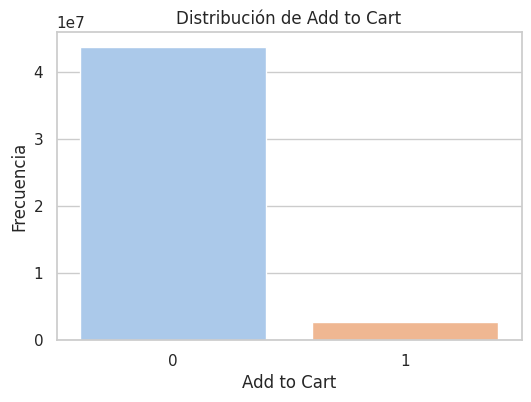

Usuarios únicos en Train: 380053
Usuarios únicos en Test: 1412
Usuarios anónimos en Train: 39694715
Usuarios anónimos en Test: 23509


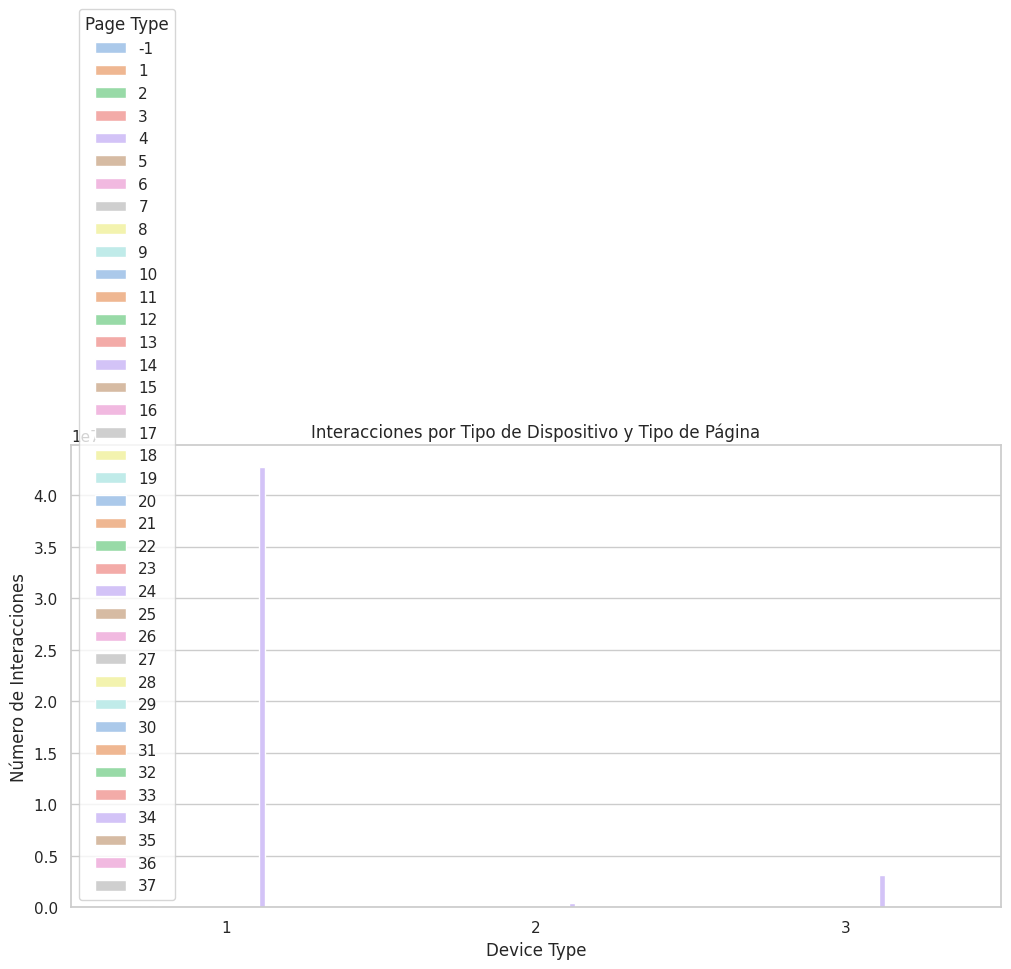

Tasa de conversión (Add to Cart = 1): 5.90%
Productos con mayor conversión:
partnumber
17      1.0
140     1.0
191     1.0
698     1.0
1146    1.0
1438    1.0
1490    1.0
2513    1.0
2561    1.0
2610    1.0
Name: add_to_cart, dtype: float64

Productos con menor conversión:
partnumber
1     0.0
2     0.0
6     0.0
7     0.0
9     0.0
10    0.0
13    0.0
15    0.0
16    0.0
19    0.0
Name: add_to_cart, dtype: float64
Conversión por Descuento:
discount
0    0.058845
1    0.060945
Name: add_to_cart, dtype: float64


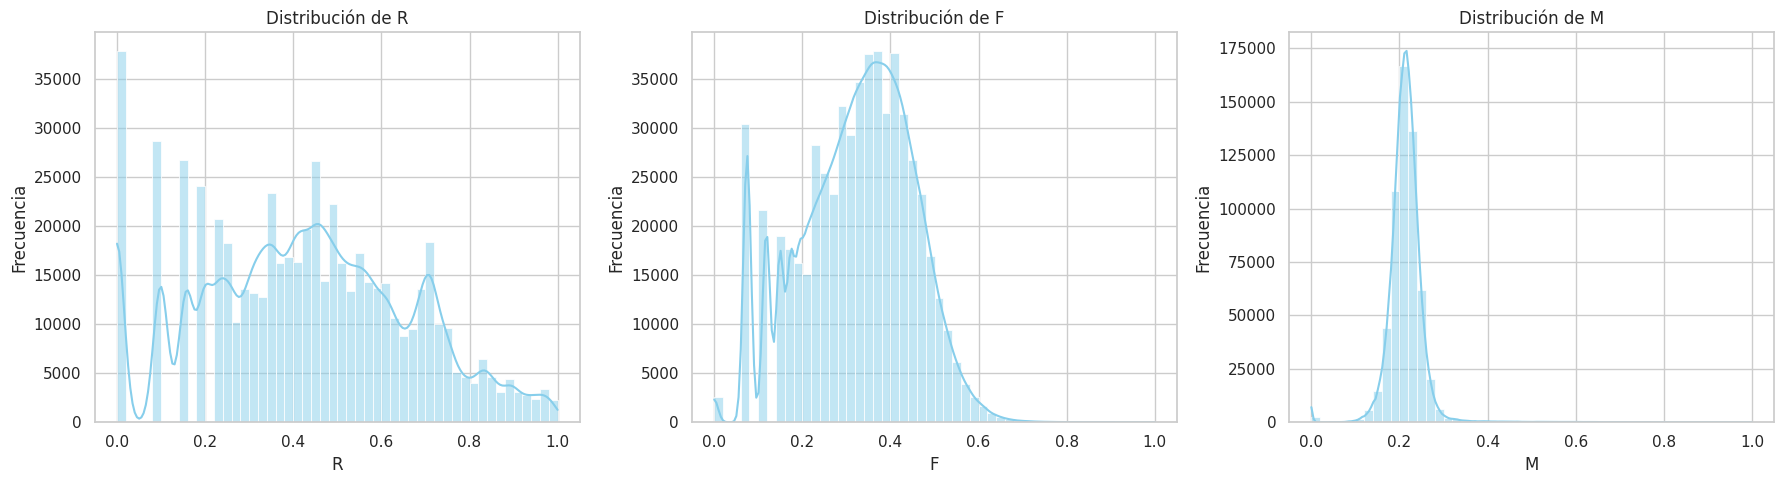

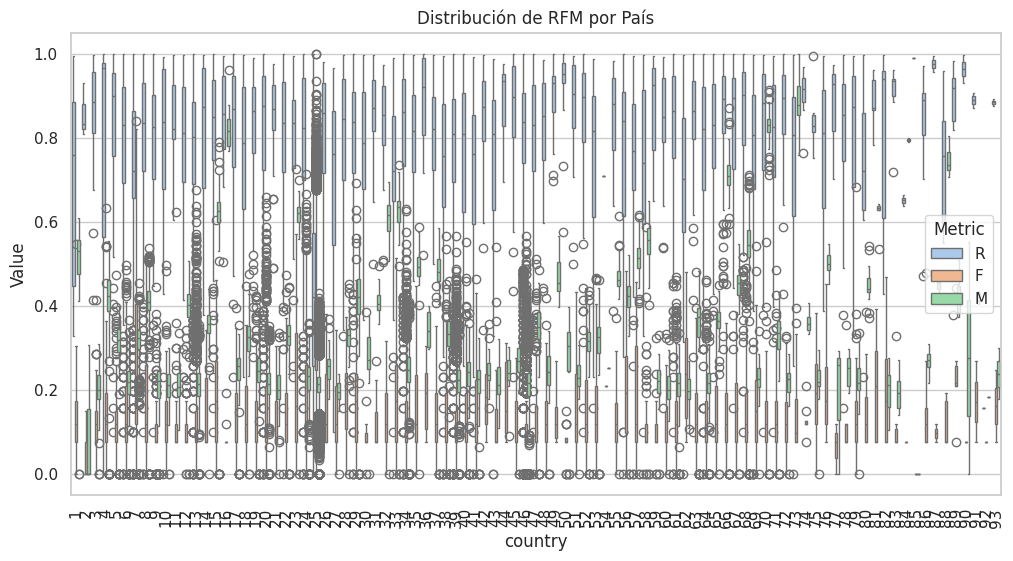

Productos más populares:
partnumber
33777    60365
32700    59547
2763     42020
11031    41648
27789    40450
30739    36682
23647    35606
9819     33840
13722    33563
30246    33422
Name: count, dtype: int64

Productos menos populares:
partnumber
28479    1
2232     1
38841    1
29662    1
9297     1
24921    1
1988     1
16286    1
23249    1
29306    1
Name: count, dtype: int64


In [5]:
# Ejecutar los análisis
analyze_add_to_cart_distribution(train)
unique_users_analysis(train, test)
interaction_by_device_pagetype(train)
conversion_rate(train)
product_conversion_analysis(train)
discount_effect(train, products)
rfm_distribution(users)
rfm_by_country(users)
product_interaction_analysis(train)


## Feature Engineering

In [7]:
from sklearn.cluster import KMeans

def rfm_segmentation(users):
    """Segmentación de usuarios en clusters según RFM."""
    kmeans = KMeans(n_clusters=4, random_state=42)
    users['rfm_cluster'] = kmeans.fit_predict(users[['R', 'F', 'M']])
    sns.pairplot(users, hue='rfm_cluster', palette='pastel')
    plt.show()
    print(users.groupby('rfm_cluster').mean())

def pagetype_conversion_analysis(train):
    """Análisis de conversión por pagetype."""
    conversion_by_pagetype = train.groupby('pagetype')['add_to_cart'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=conversion_by_pagetype.index, y=conversion_by_pagetype.values, palette='pastel')
    plt.title("Conversión por Tipo de Página")
    plt.xlabel("Page Type")
    plt.ylabel("Tasa de Conversión")
    plt.show()
    print(conversion_by_pagetype)


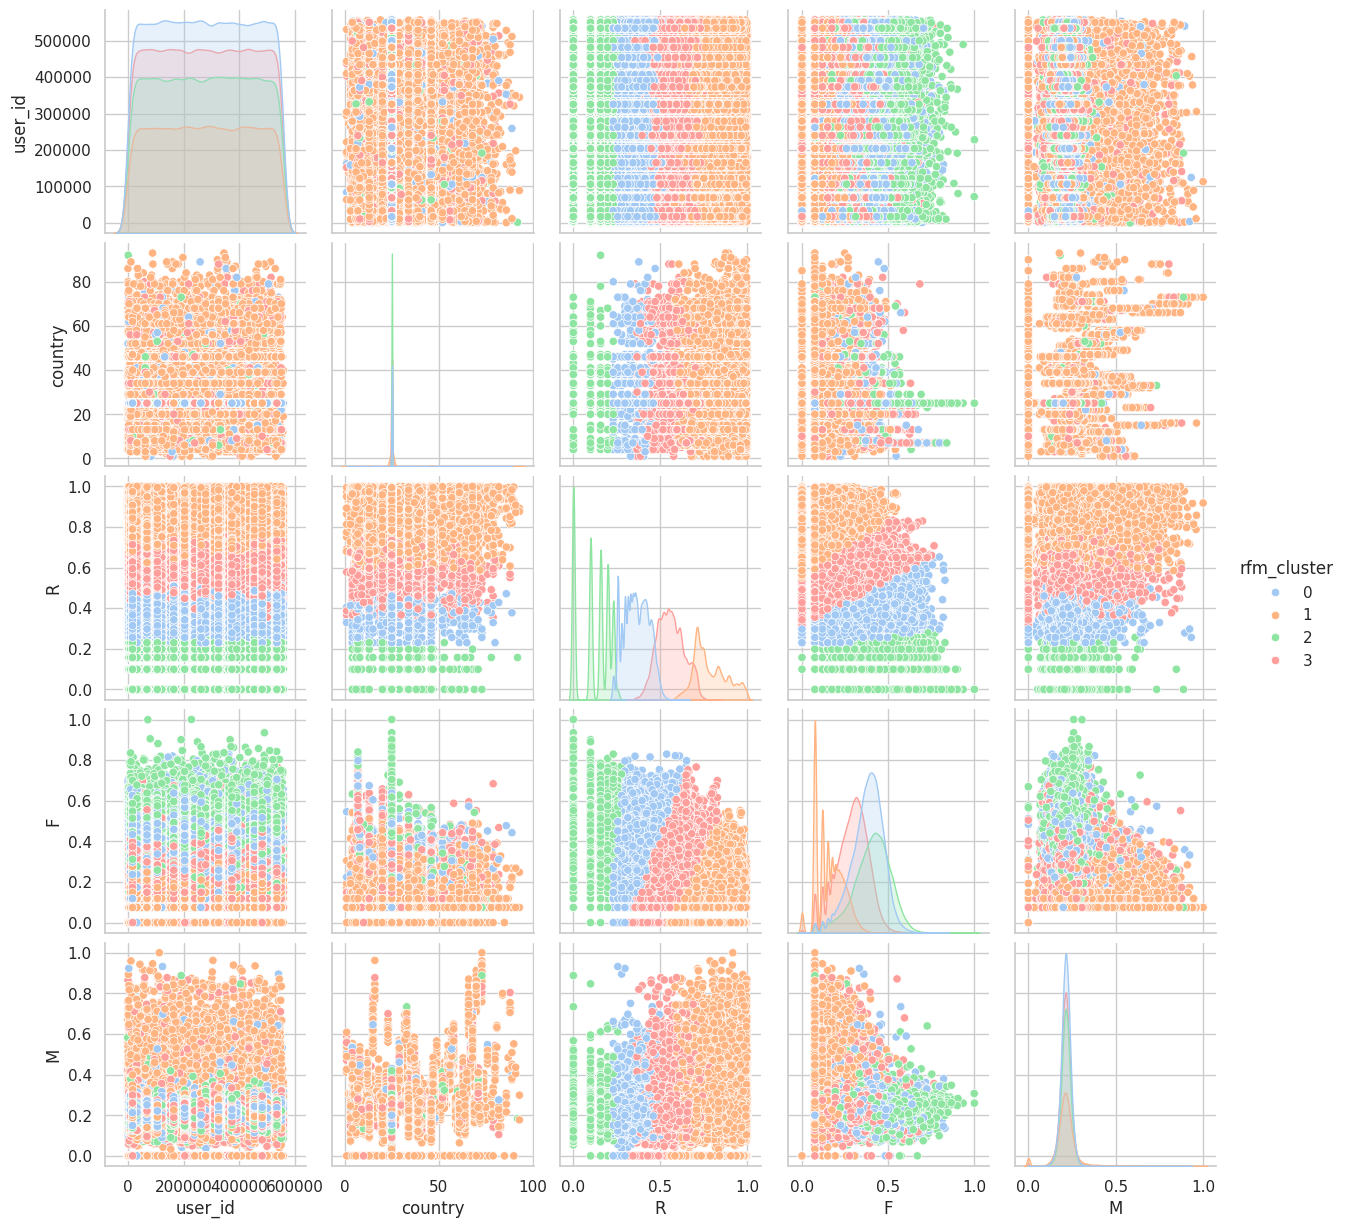

                   user_id    country         R         F         M
rfm_cluster                                                        
0            278631.768658  25.015068  0.363029  0.376984  0.214038
1            277682.315183  26.404893  0.785240  0.160453  0.217529
2            278345.326795  25.015537  0.118953  0.404812  0.214096
3            278231.737605  25.044450  0.557899  0.288670  0.212985


/tmp/ipykernel_769031/1422661431.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_pagetype.index, y=conversion_by_pagetype.values, palette='pastel')


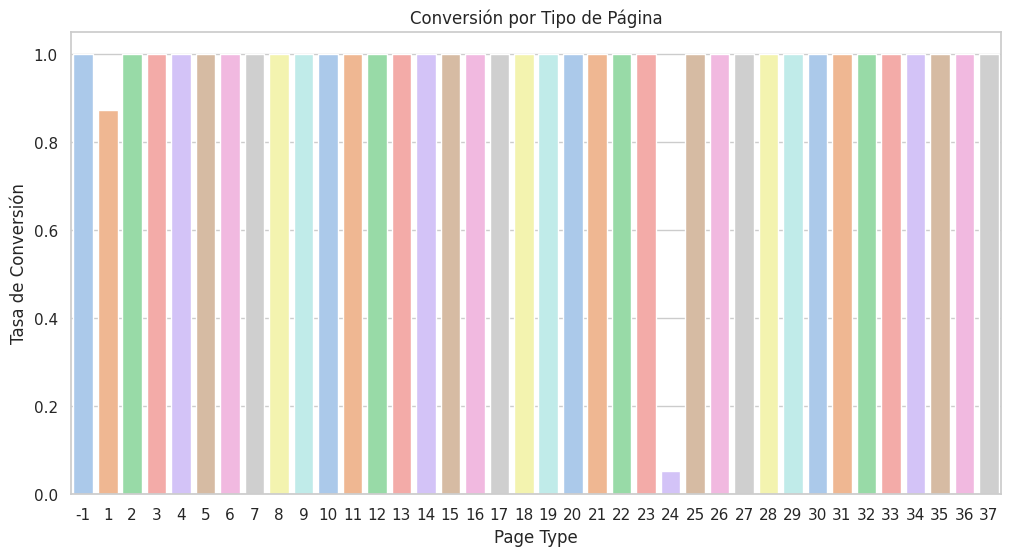

pagetype
-1     1.000000
 18    1.000000
 21    1.000000
 22    1.000000
 23    1.000000
 25    1.000000
 26    1.000000
 27    1.000000
 28    1.000000
 29    1.000000
 30    1.000000
 31    1.000000
 32    1.000000
 33    1.000000
 34    1.000000
 35    1.000000
 36    1.000000
 20    1.000000
 19    1.000000
 10    1.000000
 9     1.000000
 2     1.000000
 3     1.000000
 4     1.000000
 5     1.000000
 6     1.000000
 7     1.000000
 8     1.000000
 37    1.000000
 17    1.000000
 11    1.000000
 12    1.000000
 13    1.000000
 14    1.000000
 15    1.000000
 16    1.000000
 1     0.872673
 24    0.052990
Name: add_to_cart, dtype: float64


In [8]:
rfm_segmentation(users)
pagetype_conversion_analysis(train)

In [9]:
# Verificar qué representan los pagetype con 100% de conversión
def investigate_pagetype_conversion(train):
    conversion_by_pagetype = train.groupby('pagetype')['add_to_cart'].mean()
    count_by_pagetype = train['pagetype'].value_counts()

    pagetype_analysis = pd.DataFrame({'conversion_rate': conversion_by_pagetype, 'interaction_count': count_by_pagetype})
    pagetype_analysis = pagetype_analysis.sort_values(by='conversion_rate', ascending=False)

    print("Análisis de pagetype con alta conversión:")
    print(pagetype_analysis)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=pagetype_analysis.index, y=pagetype_analysis['interaction_count'], palette='pastel')
    plt.title("Cantidad de interacciones por Page Type")
    plt.xlabel("Page Type")
    plt.ylabel("Número de Interacciones")
    plt.xticks(rotation=90)
    plt.show()

# Explorar el comportamiento de los clusters en términos de conversión
def analyze_rfm_clusters(train, users):
    merged = train.merge(users[['user_id', 'rfm_cluster']], on='user_id', how='left')
    conversion_by_cluster = merged.groupby('rfm_cluster')['add_to_cart'].mean()

    print("Conversión por Clúster de Usuarios:")
    print(conversion_by_cluster)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=conversion_by_cluster.index, y=conversion_by_cluster.values, palette='pastel')
    plt.title("Tasa de Conversión por Clúster RFM")
    plt.xlabel("RFM Cluster")
    plt.ylabel("Tasa de Conversión")
    plt.show()

Análisis de pagetype con alta conversión:
          conversion_rate  interaction_count
pagetype                                    
-1               1.000000               1197
 18              1.000000                  1
 21              1.000000                137
 22              1.000000                 13
 23              1.000000                295
 25              1.000000                417
 26              1.000000                 49
 27              1.000000                  1
 28              1.000000                  1
 29              1.000000                  1
 30              1.000000                  1
 31              1.000000                  2
 32              1.000000                  1
 33              1.000000                  1
 34              1.000000                  2
 35              1.000000                  1
 36              1.000000                  1
 20              1.000000                280
 19              1.000000              19534
 10          

/tmp/ipykernel_769031/1778324785.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pagetype_analysis.index, y=pagetype_analysis['interaction_count'], palette='pastel')


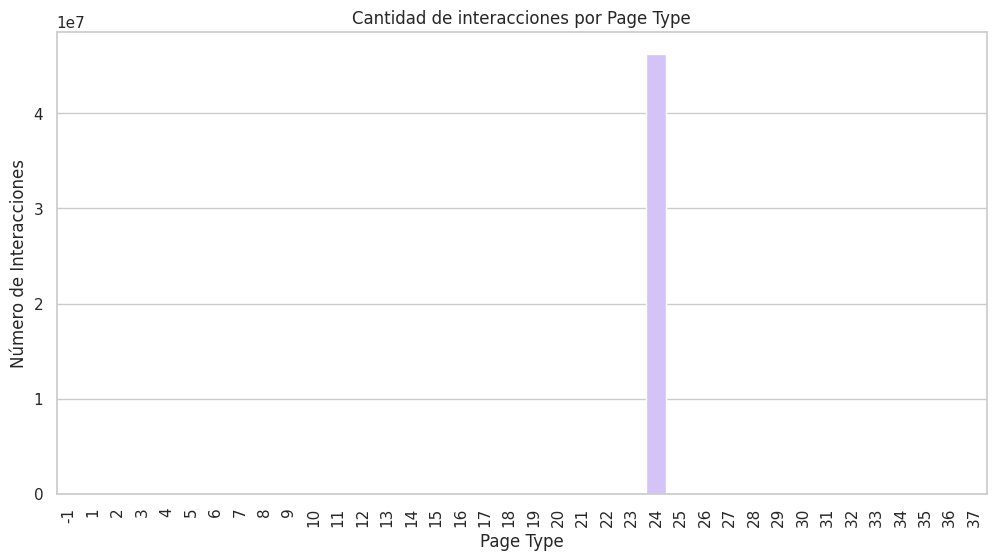

Conversión por Clúster de Usuarios:
rfm_cluster
0.0    0.069355
1.0    0.067146
2.0    0.074219
3.0    0.065644
Name: add_to_cart, dtype: float64


/tmp/ipykernel_769031/1778324785.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_cluster.index, y=conversion_by_cluster.values, palette='pastel')


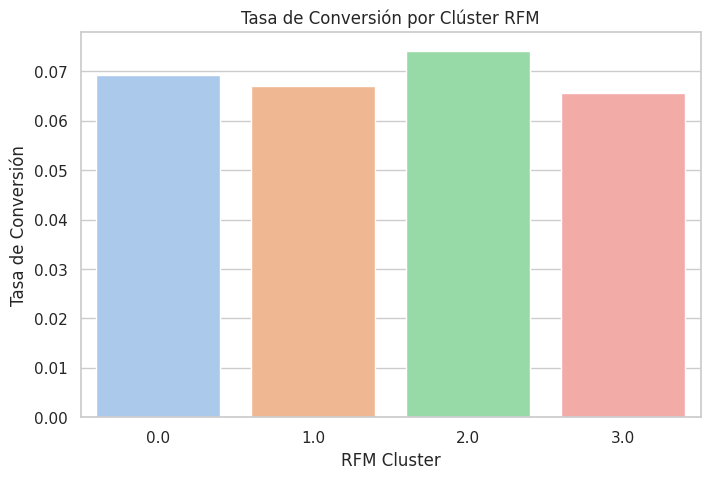

In [10]:
investigate_pagetype_conversion(train)
analyze_rfm_clusters(train, users)

In [11]:
# 1️⃣ Analizar qué dispositivos y usuarios más visitan cada pagetype
def analyze_pagetype_visitors(train):
    pagetype_device = train.groupby('pagetype')['device_type'].value_counts().unstack().fillna(0)
    pagetype_users = train.groupby('pagetype')['user_id'].apply(lambda x: (x == -1).mean())  # % de usuarios anónimos

    print("Distribución de Device Type por Pagetype:")
    print(pagetype_device)

    print("\nPorcentaje de usuarios anónimos por Pagetype:")
    print(pagetype_users)

    plt.figure(figsize=(12, 6))
    sns.heatmap(pagetype_device, cmap="Blues", annot=True, fmt=".0f")
    plt.title("Frecuencia de Device Type por Pagetype")
    plt.xlabel("Device Type")
    plt.ylabel("Pagetype")
    plt.show()

# 2️⃣ Analizar si el Clúster 2 gasta más dinero (M) o compra más frecuentemente (F)
def analyze_cluster_spending(users):
    cluster_stats = users.groupby('rfm_cluster')[['F', 'M']].mean()
    
    print("Promedio de Frecuencia (F) y Monetario (M) por Clúster:")
    print(cluster_stats)

    cluster_stats.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
    plt.title("Frecuencia y Gasto Promedio por Clúster")
    plt.ylabel("Valor Promedio")
    plt.xlabel("RFM Cluster")
    plt.show()

# 3️⃣ Ver qué productos compran los distintos clústeres
def analyze_cluster_purchases(train, users):
    merged = train.merge(users[['user_id', 'rfm_cluster']], on='user_id', how='left')
    product_by_cluster = merged.groupby(['rfm_cluster', 'partnumber']).size().unstack().fillna(0)

    print("Productos más comprados por cada Clúster:")
    print(product_by_cluster.idxmax(axis=1))  # Producto más popular en cada clúster

    plt.figure(figsize=(12, 6))
    sns.heatmap(product_by_cluster.T, cmap="coolwarm", yticklabels=False, cbar=True)
    plt.title("Mapa de Calor de Compras por Clúster y Producto")
    plt.xlabel("RFM Cluster")
    plt.ylabel("Productos")
    plt.show()



Distribución de Device Type por Pagetype:
device_type           1         2          3
pagetype                                    
-1               1197.0       0.0        0.0
 1               2566.0       4.0     1082.0
 2                  5.0       0.0        0.0
 3                192.0       0.0        0.0
 4                  1.0       0.0        0.0
 5                164.0       0.0        1.0
 6             106777.0    1331.0     5383.0
 7               6595.0      98.0     1266.0
 8             101600.0    1326.0    26714.0
 9                 27.0       0.0        1.0
 10               236.0       0.0        0.0
 11                27.0       0.0        0.0
 12                63.0       0.0        0.0
 13                54.0       0.0        0.0
 14                33.0       0.0        0.0
 15                10.0       0.0        0.0
 16             12197.0     191.0     2971.0
 17              2270.0       0.0        0.0
 18                 1.0       0.0        0.0
 19          

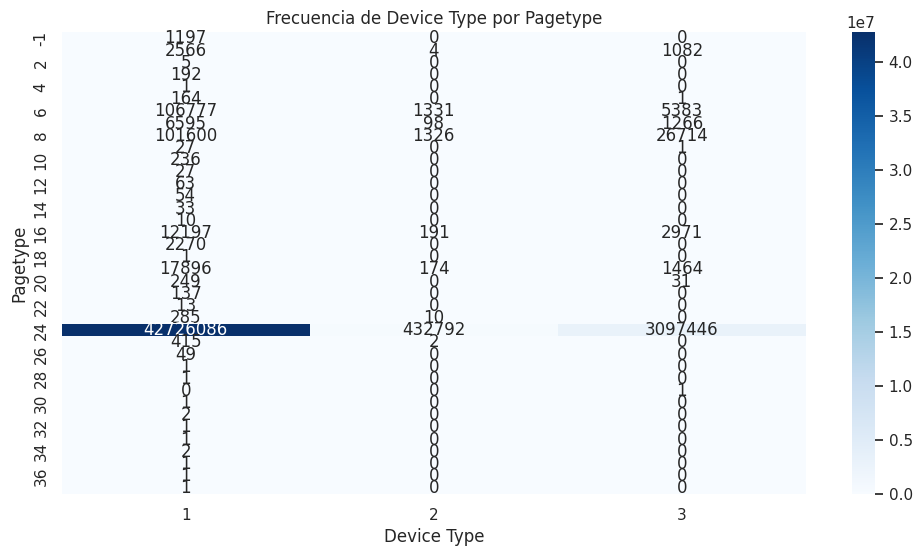

Promedio de Frecuencia (F) y Monetario (M) por Clúster:
                    F         M
rfm_cluster                    
0            0.376984  0.214038
1            0.160453  0.217529
2            0.404812  0.214096
3            0.288670  0.212985


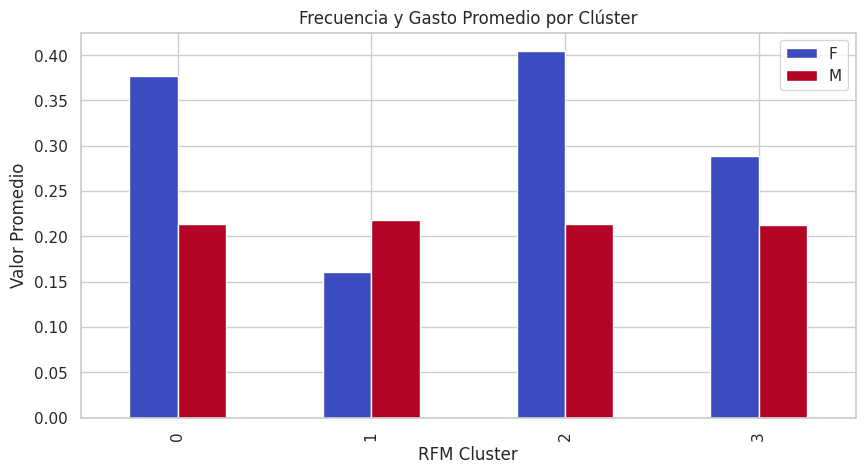

Productos más comprados por cada Clúster:
rfm_cluster
0.0    32700
1.0    33777
2.0    32700
3.0    33777
dtype: int32


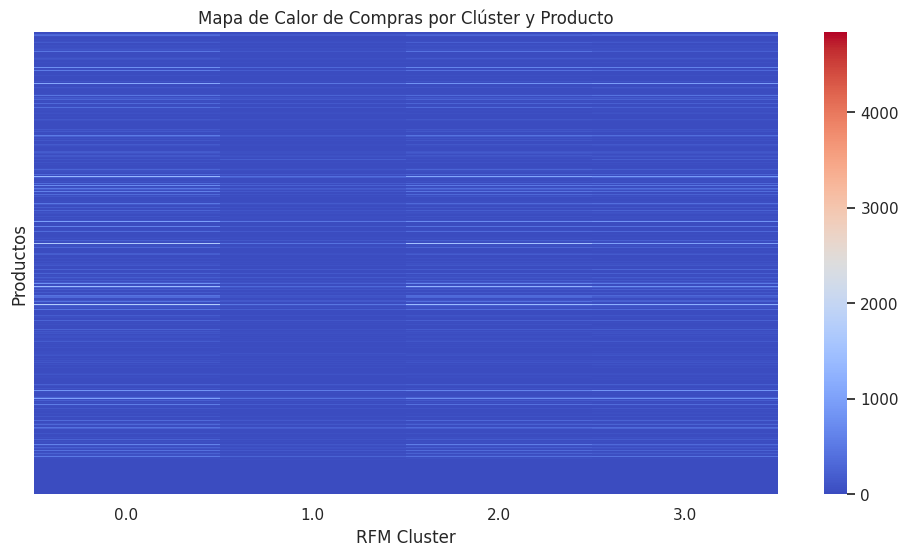

In [12]:
# Ejecutar análisis
analyze_pagetype_visitors(train)
analyze_cluster_spending(users)
analyze_cluster_purchases(train, users)

### **📌 Resumen de Descubrimientos y Puntos Clave**



#### **1️⃣ `pagetype` y su impacto en la conversión**
- **`pagetype = 24` es el más visitado con 42.7M de interacciones, pero tiene una conversión muy baja (5.3%).**  
  - **Es visitado en su mayoría por usuarios anónimos (~85%)**, lo que sugiere que es una página de exploración o inicio.  
  - **`device_type = 1` (probablemente móviles) es el más utilizado.**

- **`pagetype = 6 y 8` tienen más de 100,000 interacciones y conversión del 100%.**  
  - Esto indica que podrían estar relacionados con el checkout o la finalización de la compra.  

✅ **Conclusión:**  
- `pagetype = 24` es clave para atraer tráfico, pero tiene baja conversión.  
- `pagetype = 6 y 8` son puntos críticos en la compra.  
- **Siguiente paso:** Analizar cómo evolucionan los usuarios de `pagetype = 24` y si terminan convirtiendo.  

---

#### **2️⃣ Comportamiento de los Clústeres RFM**
- **El Clúster 2 es el más valioso** en términos de frecuencia de compra (`F = 0.40`), lo que indica clientes recurrentes.  
- **El gasto (`M`) es similar en todos los clústeres (~0.21),** lo que sugiere que la frecuencia es más relevante que el monto gastado.  

✅ **Conclusión:**  
- **El Clúster 2 debería recibir recomendaciones de productos premium o estrategias de fidelización.**  
- **Siguiente paso:** Diseñar estrategias de cross-selling y recomendaciones personalizadas para aumentar su gasto.  

---

#### **3️⃣ Productos más comprados por Clúster**
- **Los productos más populares son `32700` y `33777` en todos los clústeres.**  
- **No hay diferenciación clara de productos por clúster.**  
- **Se necesita analizar embeddings de productos para descubrir patrones ocultos en las preferencias de los usuarios.**  

✅ **Conclusión:**  
- **No hay productos exclusivos por clúster, por lo que podemos explorar embeddings para mejorar recomendaciones.**  
- **Siguiente paso:** Analizar similitudes entre productos con embeddings para entender mejor las preferencias de compra.  


---

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 2️⃣ Optimización de recomendaciones para Clúster 2 (Mejorar tasa de conversión)
def analyze_cluster_2_conversion(train, users):
    merged = train.merge(users[['user_id', 'rfm_cluster']], on='user_id', how='left')
    cluster_2_data = merged[merged['rfm_cluster'] == 2]

    conversion_by_product = cluster_2_data.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False)
    
    print("Productos con mayor conversión en Clúster 2:")
    print(conversion_by_product.head(10))

    plt.figure(figsize=(10, 5))
    sns.barplot(x=conversion_by_product.index[:10], y=conversion_by_product.values[:10], palette='coolwarm')
    plt.title("Top 10 Productos con Mayor Conversión en Clúster 2")
    plt.xlabel("Product ID")
    plt.ylabel("Tasa de Conversión")
    plt.xticks(rotation=90)
    plt.show()

# 3️⃣ Exploración de similitudes entre productos con embeddings
def analyze_product_embeddings(products):
    # Verificar si los valores ya son arrays
    assert isinstance(products['embedding_reduced'].iloc[0], np.ndarray), "Embeddings no son NumPy arrays"

    # Convertir la columna de embeddings a matriz NumPy
    product_embeddings = np.vstack(products['embedding_reduced'].values)

    # Calcular similitudes de coseno
    similarity_matrix = cosine_similarity(product_embeddings)

    # Crear un mapa de calor de similitud
    plt.figure(figsize=(12, 6))
    sns.heatmap(similarity_matrix[:50, :50], cmap="coolwarm", xticklabels=False, yticklabels=False)
    plt.title("Mapa de Calor de Similitud de Embeddings de Productos (Muestra)")
    plt.show()

    print("Ejemplo de similitud entre productos:")
    print(similarity_matrix[:5, :5])  # Mostrar similitudes de los primeros 5 productos



Productos con mayor conversión en Clúster 2:
partnumber
40024    1.0
15578    1.0
9844     1.0
35844    1.0
35825    1.0
899      1.0
26757    1.0
35533    1.0
14852    1.0
35378    1.0
Name: add_to_cart, dtype: float64


/tmp/ipykernel_769031/37303996.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_product.index[:10], y=conversion_by_product.values[:10], palette='coolwarm')


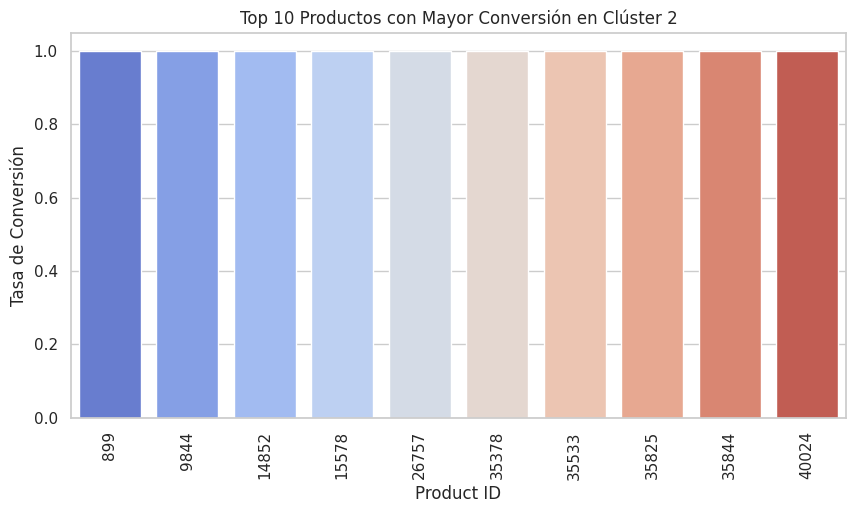

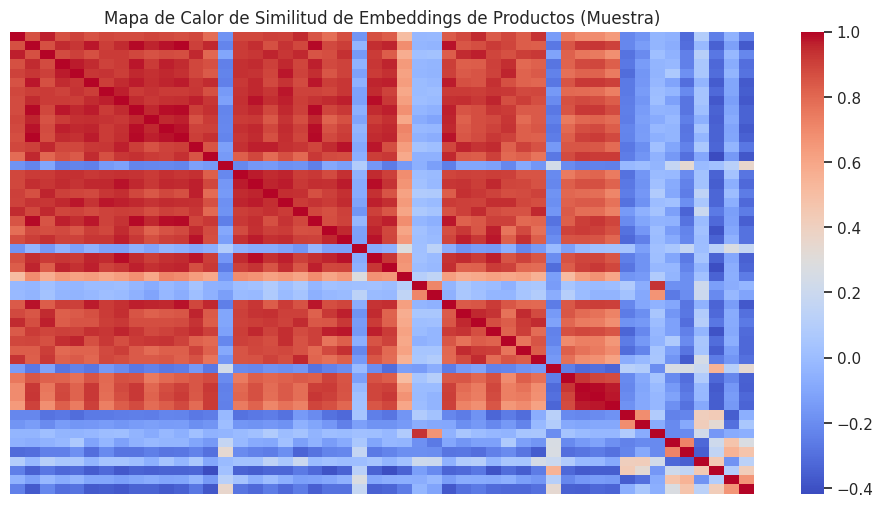

Ejemplo de similitud entre productos:
[[1.0000001  0.86418283 0.96270293 0.86646765 0.89729285]
 [0.86418283 1.         0.86637473 0.94754916 0.9240101 ]
 [0.96270293 0.86637473 0.99999994 0.8747864  0.9008792 ]
 [0.86646765 0.94754916 0.8747864  1.         0.96881545]
 [0.89729285 0.9240101  0.9008792  0.96881545 1.0000002 ]]


In [20]:
# Ejecutar los análisis
analyze_cluster_2_conversion(train, users)
analyze_product_embeddings(products)

## Primer enfoque para el entrenamiento del modelo

### **📌 Resumen de la Situación Actual y Descubrimientos Clave**  

#### **1️⃣ Lo que sabemos del dataset y las interacciones**
✅ **Usuarios:**  
   - Tenemos **usuarios registrados (`user_id`) y anónimos (`user_id = -1`)** → Necesitamos un enfoque híbrido.  
   - Los usuarios están segmentados en clústeres según **RFM (Recencia, Frecuencia, Monetario)**.  
   - El **Clúster 2 es el más valioso** porque sus usuarios compran con mayor frecuencia.  

✅ **Productos:**  
   - Cada producto tiene **embeddings generados con técnicas de visión computacional**.  
   - Podemos calcular similitud entre productos con **cosine similarity en embeddings**.  
   - Algunos productos tienen **una conversión del 100% en Clúster 2**, lo que indica productos muy relevantes.  

✅ **Interacciones en `train` y `test`:**  
   - `add_to_cart = 1` nos sirve como proxy de relevancia.  
   - `pagetype = 24` es una página de navegación y no aporta mucho a la recomendación.  
   - `device_type` puede influir en la forma en que los usuarios interactúan.  

✅ **Formato de salida:**  
   - Debemos generar un JSON con todas las `session_id` de `test`.  
   - Cada `session_id` debe tener **5 recomendaciones únicas y bien ordenadas** (importante por NDCG).  

---

#### **2️⃣ Lo que es importante para el modelo de recomendación**
📌 **Basándonos en la métrica NDCG, tenemos que optimizar la calidad y el orden de las recomendaciones.**  
📌 **El modelo debe manejar tanto usuarios con historial como usuarios nuevos/anónimos.**  

🔹 **Para usuarios con historial (`user_id` conocido):**  
   - Podemos usar **Filtrado Colaborativo** (ALS, SVD, etc.).  
   - También podemos combinarlo con **modelo basado en contenido (embeddings de productos)**.  

🔹 **Para usuarios anónimos (`user_id = -1` en test):**  
   - Podemos recomendar productos populares y con alta conversión.  
   - Podemos usar **embeddings de productos para sugerir productos similares a los más vistos.**  

🔹 **Relevancia y Ranking:**  
   - `add_to_cart = 1` es nuestro objetivo principal.  
   - Los productos con alta conversión en Clúster 2 deben ser priorizados.  
   - La similitud entre productos nos permite recomendar productos complementarios.  

---

#### **🚀 Próximos pasos: Preparación de Datos**
Para construir un modelo eficiente, primero preparamos los datos.  

✅ **Limpieza y selección de datos:**  
   - Filtrar `train` para eliminar interacciones irrelevantes.  
   - Extraer usuarios y productos con más actividad.  

✅ **Generación de features:**  
   - Crear una matriz usuario-producto para modelos de **Filtrado Colaborativo**.  
   - Construir una matriz de similitud de productos usando **embeddings**.  
   - Definir una estrategia para usuarios anónimos.  

✅ **Formato de salida:**  
   - Garantizar que el JSON final tenga todas las `session_id` y 5 recomendaciones únicas por cada una.  

---

### Preparación de los datos (1/900)

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

In [4]:
# 2️⃣ Filtrar datos relevantes para recomendaciones (solo compras)
train = train[train['add_to_cart'] == 1]

# 3️⃣ Crear matriz usuario-producto para Filtrado Colaborativo (Formato Disperso)
# Agrupar datos para evitar duplicados antes de pivotar
user_product_interactions = train.groupby(['user_id', 'partnumber'])['add_to_cart'].sum().reset_index()

# Filtrar productos con menos de 5 interacciones (opcional para reducir memoria)
product_counts = user_product_interactions['partnumber'].value_counts()
popular_products = product_counts[product_counts >= 5].index
user_product_interactions = user_product_interactions[user_product_interactions['partnumber'].isin(popular_products)]

# Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(user_product_interactions['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(user_product_interactions['partnumber'].unique())}

user_product_interactions['user_index'] = user_product_interactions['user_id'].map(user_to_index)
user_product_interactions['product_index'] = user_product_interactions['partnumber'].map(product_to_index)

# Crear matriz dispersa
sparse_matrix = csr_matrix(
    (user_product_interactions['add_to_cart'], 
     (user_product_interactions['user_index'], user_product_interactions['product_index']))
)

print(f"✅ Matriz usuario-producto creada. Tamaño: {sparse_matrix.shape}")

# 4️⃣ Calcular matriz de similitud entre productos usando embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)  # Convertir a matriz NumPy
similarity_matrix = cosine_similarity(product_embeddings)  # Matriz de similitud entre productos

print("✅ Matriz de similitud entre productos calculada.")

# 5️⃣ Extraer productos más populares (para usuarios anónimos)
popular_products = train['partnumber'].value_counts().index[:5].tolist()  # Top 5 productos más comprados

# 6️⃣ Garantizar compatibilidad con test (formato de salida)
session_ids = test['session_id'].unique()  # Todas las session_id de test

# 7️⃣ Crear estructura base del JSON de salida
recommendations = {str(session): popular_products for session in session_ids}  # Inicializamos con productos populares

# 8️⃣ Guardar en JSON
with open('predictions_3.json', 'w') as f:
    json.dump({"target": recommendations}, f, indent=4)

print("✅ Datos preparados y JSON generado con estructura inicial.")

✅ Matriz usuario-producto creada. Tamaño: (149532, 12674)
✅ Matriz de similitud entre productos calculada.
✅ Datos preparados y JSON generado con estructura inicial.


## Modelo hibrido - Filtrado colaborativo + similitud de productos (2/900)

In [2]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Configuración para evitar problemas con OpenBLAS
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# 2️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 3️⃣ Filtrar interacciones relevantes (solo compras)
train = train[train['add_to_cart'] == 1]

# 4️⃣ Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)

# 5️⃣ Crear matriz usuario-producto dispersa
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)

# 6️⃣ Aplicar Filtrado Colaborativo (ALS)
als_model = AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20)
als_model.fit(sparse_matrix)

# 7️⃣ Calcular matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)

# 8️⃣ Generar recomendaciones personalizadas por sesión
session_ids = test['session_id'].unique()
recommendations = {}

# Productos más populares como fallback
popular_products = train['partnumber'].value_counts().index[:5].tolist()

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]

    if user_id in user_to_index:  # Si el usuario tiene historial, usamos ALS
        user_idx = user_to_index[user_id]
        recommended_product_indices = als_model.recommend(user_idx, sparse_matrix[user_idx], N=5)[0]
        recommended_products = [list(product_to_index.keys())[i] for i in recommended_product_indices]

    else:  # Si no tiene historial, usamos similitud de productos o productos populares
        last_seen_product = session_data['partnumber'].iloc[-1] if not session_data.empty else None
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            similar_product_indices = np.argsort(similarity_matrix[product_idx])[-6:-1][::-1]

            # Validar que los índices existan
            valid_indices = [i for i in similar_product_indices if i < len(product_to_index)]
            recommended_products = [list(product_to_index.keys())[i] for i in valid_indices]

            # Rellenar con productos populares si faltan recomendaciones
            while len(recommended_products) < 5:
                for p in popular_products:
                    if p not in recommended_products:
                        recommended_products.append(p)
                    if len(recommended_products) == 5:
                        break
        else:
            recommended_products = popular_products

    recommendations[str(session)] = recommended_products

# 9️⃣ Guardar en JSON
# Convertir claves y valores a tipos estándar de Python antes de guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}

# Guardar en JSON
with open('predictions_3.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Modelo corregido y JSON generado sin problemas de tipo de dato.")


  0%|          | 0/20 [00:00<?, ?it/s]

✅ Modelo corregido y JSON generado sin problemas de tipo de dato.


## Evolución del modelo de recomendación (15/900)

- Usar más información de la sesión:
    - Considerar interacciones previas (pagetype, device_type).
    - No solo add_to_cart, sino también productos vistos recientemente.
- Optimizar el ranking de recomendaciones:
    - Poner en primer lugar productos que históricamente convierten mejor en el segmento del usuario.
    - Ajustar el orden para mejorar la métrica NDCG.
- Mejorar las recomendaciones para usuarios nuevos (user_id = -1)
    - Si han visto productos, recomendar productos similares.
    - Si no hay información, mejorar el mix de productos populares.

In [18]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Configuración para optimizar rendimiento
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# 2️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 3️⃣ Filtrar interacciones relevantes (usamos todas las interacciones, no solo add_to_cart)
train = train[train['pagetype'] != 24]  # Excluimos navegación irrelevante

# 4️⃣ Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)

# 5️⃣ Crear matriz usuario-producto dispersa para ALS
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)

# 6️⃣ Aplicar Filtrado Colaborativo (ALS)
als_model = AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20)
als_model.fit(sparse_matrix)

# 7️⃣ Calcular matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)

# 8️⃣ Extraer productos más populares y con alta conversión
popular_products = train['partnumber'].value_counts().index[:20].tolist()  # Top 20 productos más comprados
high_conversion_products = train.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False).index[:20].tolist()

# 9️⃣ Generar recomendaciones personalizadas por sesión
session_ids = test['session_id'].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]

    # Extraer productos vistos en la sesión
    viewed_products = session_data['partnumber'].tolist()

    # Si el usuario tiene historial, usamos ALS para recomendar productos
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        # Obtener recomendaciones de ALS (formato: [(product_index, score), ...])
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        # Extraer solo los índices de producto recomendados y convertir a `int`
        recommended_product_indices = [int(item[0]) for item in recommendations_als]
        # Convertir índices de producto a `partnumber`
        recommended_products = [list(product_to_index.keys())[i] for i in recommended_product_indices if i in product_to_index.values()]
    elif viewed_products:  # 🔹 Si el usuario ha visto productos, usamos similitud de embeddings
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            # Obtener los productos más similares
            similar_product_indices = np.argsort(similarity_matrix[product_idx])[-10:][::-1]
            # Filtrar solo los índices válidos
            valid_indices = [i for i in similar_product_indices if i < len(product_to_index)]
            # Convertir a `partnumber`
            recommended_products = [list(product_to_index.keys())[i] for i in valid_indices]
    else:  # 🔹 Usuarios sin historial → Popularidad + Productos con alta conversión
        recommended_products = popular_products[:5] + high_conversion_products[:5]
        recommended_products = list(set(recommended_products))[:5]  # Aseguramos que sean únicos

    # 🔹 Ordenamos recomendaciones priorizando productos con alta conversión en el clúster del usuario
    recommended_products = sorted(recommended_products, key=lambda x: -train[train['partnumber'] == x]['add_to_cart'].mean())

    recommendations[str(session)] = recommended_products[:5]  # Aseguramos 5 recomendaciones

for session, recs in recommendations.items():
    if len(recs) < 5:
        additional_products = high_conversion_products + popular_products  # Combinamos ambas listas
        additional_products = [p for p in additional_products if p not in recs]  # Evitamos duplicados
        recommendations[session] = recs + additional_products[:5 - len(recs)]  # Solo añadimos lo necesario

# 🔟 Guardar en JSON
# Convertir claves y valores a tipos estándar de Python antes de guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}

# Guardar en JSON
with open('predictions_3.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Modelo corregido y JSON generado sin problemas de tipo de dato.")


  0%|          | 0/20 [00:00<?, ?it/s]

✅ Modelo corregido y JSON generado sin problemas de tipo de dato.


In [ ]:
# evaluate_als_with_validation
from sklearn.metrics import ndcg_score
from sklearn.model_selection import train_test_split

def evaluate_als_with_validation(train, als_model, sparse_matrix, user_to_index, product_to_index):
    """ Evalúa ALS dividiendo train en train/val y calculando NDCG@5. """

    # 🔹 1️⃣ Dividir `train` en 80% entrenamiento, 20% validación
    train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

    # 🔹 2️⃣ Crear diccionarios de interacciones reales y predicciones
    actuals = {}  # Productos reales que los usuarios compraron en `val`
    predictions = {}  # Recomendaciones generadas por ALS

    for user_id in val_data['user_id'].unique():
        user_transactions = val_data[val_data['user_id'] == user_id]
        actuals[user_id] = user_transactions['partnumber'].tolist()  # Productos que realmente compró

        # 🔹 Generamos predicciones con ALS
        if user_id in user_to_index:
            user_idx = user_to_index[user_id]
            recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=5)
            recommended_products = [list(product_to_index.keys())[int(item[0])] for item in recommendations_als]
        else:
            recommended_products = []  # Usuarios sin historial

        predictions[user_id] = recommended_products

    # 🔹 3️⃣ Calcular métricas NDCG@5, Recall@5 y Precision@5
    ndcg_values, recall_values, precision_values = [], [], []

    for user_id in actuals:
        true_items = set(actuals[user_id])  # Productos realmente comprados
        recommended_items = predictions.get(user_id, [])  # Productos recomendados por ALS

        if not true_items:  # Ignorar usuarios sin compras en validación
            continue

        # 🔹 NDCG@5 (evalúa si los productos recomendados son relevantes y bien ordenados)
        relevance_vector = [1 if item in true_items else 0 for item in recommended_items]
        ndcg_values.append(ndcg_score([relevance_vector], [list(range(len(relevance_vector), 0, -1))]))

        # 🔹 Recall@5 = (# Productos correctos) / (# Productos comprados realmente)
        recall_values.append(len(true_items & set(recommended_items)) / len(true_items))

        # 🔹 Precision@5 = (# Productos correctos) / (# Productos recomendados)
        precision_values.append(len(true_items & set(recommended_items)) / len(recommended_items) if recommended_items else 0)

    # 🔹 4️⃣ Promediamos las métricas
    ndcg_avg = np.mean(ndcg_values)
    recall_avg = np.mean(recall_values)
    precision_avg = np.mean(precision_values)

    print("\n📊 Evaluación del Modelo ALS con Validación:")
    print(f"✅ NDCG@5: {ndcg_avg:.4f}")
    print(f"✅ Recall@5: {recall_avg:.4f}")
    print(f"✅ Precision@5: {precision_avg:.4f}")

    return ndcg_avg, recall_avg, precision_avg

# 🔹 Ejecutar evaluación usando `train` dividido en `train/val`
ndcg, recall, precision = evaluate_als_with_validation(
    train, als_model, sparse_matrix, user_to_index, product_to_index
)



📊 Evaluación del Modelo ALS con Validación:
✅ NDCG@5: 0.0002
✅ Recall@5: 0.0001
✅ Precision@5: 0.0001


## Optimización del modelo ALS (53/900)

In [2]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Configuración para optimizar rendimiento
os.environ["OPENBLAS_NUM_THREADS"] = "1"


# 2️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)


# 3️⃣ Filtrar interacciones relevantes (usamos todas las interacciones, no solo add_to_cart)
train = train[train['pagetype'] != 24]  # Excluimos navegación irrelevante


# 4️⃣ Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)


# 5️⃣ Crear matriz usuario-producto dispersa para ALS
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)


# 6️⃣ Aplicar Filtrado Colaborativo (ALS)
als_model = AlternatingLeastSquares(factors=250, regularization=0.8, iterations=50)
als_model.fit(sparse_matrix)


# 7️⃣ Calcular matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)


# 8️⃣ Extraer productos más populares y con alta conversión
popular_products = train['partnumber'].value_counts().index[:20].tolist()  # Top 20 productos más comprados
high_conversion_products = train.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False).index[:20].tolist()


# 9️⃣ Generar recomendaciones personalizadas por sesión
session_ids = test['session_id'].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]

    # Extraer productos vistos en la sesión
    viewed_products = session_data['partnumber'].tolist()
    recommended_products = []  # Inicializamos vacío

    # Si el usuario tiene historial, usamos ALS para recomendar productos
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        # Obtener recomendaciones de ALS (formato: [(product_index, score), ...])
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        # Extraer solo los índices de producto recomendados y convertir a `int`
        recommended_product_indices = [int(item[0]) for item in recommendations_als]
        # Convertir índices de producto a `partnumber`
        recommended_products = [list(product_to_index.keys())[i] for i in recommended_product_indices if i in product_to_index.values()]

    # Si hay menos de 5 recomendaciones, rellenamos con embeddings
    if len(recommended_products) < 5 and viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            # Obtener los productos más similares
            similar_product_indices = np.argsort(similarity_matrix[product_idx])[-10:][::-1]
            # Filtrar solo los índices válidos
            valid_indices = [i for i in similar_product_indices if i < len(product_to_index)]
            # Convertir a `partnumber` y añadir sin duplicar
            recommended_products.extend([list(product_to_index.keys())[i] for i in valid_indices if list(product_to_index.keys())[i] not in recommended_products])

    # Si aún no tenemos 5, completamos con productos populares y de alta conversión
    if len(recommended_products) < 5:
        additional_products = high_conversion_products + popular_products  # Combinamos ambas listas
        additional_products = [p for p in additional_products if p not in recommended_products]  # Evitamos duplicados
        recommended_products.extend(additional_products[:5 - len(recommended_products)])  # Solo añadimos lo necesario

    # 🔹 Ordenamos recomendaciones priorizando productos con alta conversión en el clúster del usuario
    recommended_products = sorted(recommended_products, key=lambda x: -train[train['partnumber'] == x]['add_to_cart'].mean())

    recommendations[str(session)] = recommended_products[:5]  # Aseguramos 5 recomendaciones


# 🔟 Guardar en JSON
# Convertir claves y valores a tipos estándar de Python antes de guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}

# Guardar en JSON
with open('predictions_3.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Modelo optimizado y JSON generado con recomendaciones mejoradas.")


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Modelo optimizado y JSON generado con recomendaciones mejoradas.


In [4]:
# evaluate_als_with_validation
from sklearn.metrics import ndcg_score
from sklearn.model_selection import train_test_split

def evaluate_als_with_validation(train, als_model, sparse_matrix, user_to_index, product_to_index):
    """ Evalúa ALS dividiendo train en train/val y calculando NDCG@5. """

    # 🔹 1️⃣ Dividir `train` en 80% entrenamiento, 20% validación
    train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

    # 🔹 2️⃣ Crear diccionarios de interacciones reales y predicciones
    actuals = {}  # Productos reales que los usuarios compraron en `val`
    predictions = {}  # Recomendaciones generadas por ALS

    for user_id in val_data['user_id'].unique():
        user_transactions = val_data[val_data['user_id'] == user_id]
        actuals[user_id] = user_transactions['partnumber'].tolist()  # Productos que realmente compró

        # 🔹 Generamos predicciones con ALS
        if user_id in user_to_index:
            user_idx = user_to_index[user_id]
            recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=5)
            recommended_products = [list(product_to_index.keys())[int(item[0])] for item in recommendations_als]
        else:
            recommended_products = []  # Usuarios sin historial

        predictions[user_id] = recommended_products

    # 🔹 3️⃣ Calcular métricas NDCG@5, Recall@5 y Precision@5
    ndcg_values, recall_values, precision_values = [], [], []

    for user_id in actuals:
        true_items = set(actuals[user_id])  # Productos realmente comprados
        recommended_items = predictions.get(user_id, [])  # Productos recomendados por ALS

        if not true_items:  # Ignorar usuarios sin compras en validación
            continue

        # 🔹 NDCG@5 (evalúa si los productos recomendados son relevantes y bien ordenados)
        relevance_vector = [1 if item in true_items else 0 for item in recommended_items]
        ndcg_values.append(ndcg_score([relevance_vector], [list(range(len(relevance_vector), 0, -1))]))

        # 🔹 Recall@5 = (# Productos correctos) / (# Productos comprados realmente)
        recall_values.append(len(true_items & set(recommended_items)) / len(true_items))

        # 🔹 Precision@5 = (# Productos correctos) / (# Productos recomendados)
        precision_values.append(len(true_items & set(recommended_items)) / len(recommended_items) if recommended_items else 0)

    # 🔹 4️⃣ Promediamos las métricas
    ndcg_avg = np.mean(ndcg_values)
    recall_avg = np.mean(recall_values)
    precision_avg = np.mean(precision_values)

    print("\n📊 Evaluación del Modelo ALS con Validación:")
    print(f"✅ NDCG@5: {ndcg_avg:.4f}")
    print(f"✅ Recall@5: {recall_avg:.4f}")
    print(f"✅ Precision@5: {precision_avg:.4f}")

    return ndcg_avg, recall_avg, precision_avg

# 🔹 Ejecutar evaluación usando `train` dividido en `train/val`
ndcg, recall, precision = evaluate_als_with_validation(
    train, als_model, sparse_matrix, user_to_index, product_to_index
)



📊 Evaluación del Modelo ALS con Validación:
✅ NDCG@5: 0.0002
✅ Recall@5: 0.0001
✅ Precision@5: 0.0001


## Optimización modelo ALS - (factors=500, regularization=0.5, iterations=75) (53/900)
- Sin pagetype=24 : Resultado 53/900
- Con pagetype=24 : Resultado 35/900


In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Configuración para optimizar rendimiento
os.environ["OPENBLAS_NUM_THREADS"] = "1"


# 2️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)


# 3️⃣ Filtrar interacciones relevantes (usamos todas las interacciones, no solo add_to_cart)
train = train[train['pagetype'] != 24]  # Excluimos navegación irrelevante


# 4️⃣ Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)


# 5️⃣ Crear matriz usuario-producto dispersa para ALS
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)


# 6️⃣ Aplicar Filtrado Colaborativo (ALS)
als_model = AlternatingLeastSquares(factors=500, regularization=0.5, iterations=75)
als_model.fit(sparse_matrix)


# 7️⃣ Calcular matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)


# 8️⃣ Extraer productos más populares y con alta conversión
popular_products = train['partnumber'].value_counts().index[:20].tolist()  # Top 20 productos más comprados
high_conversion_products = train.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False).index[:20].tolist()


# 9️⃣ Generar recomendaciones personalizadas por sesión
session_ids = test['session_id'].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]

    # Extraer productos vistos en la sesión
    viewed_products = session_data['partnumber'].tolist()
    recommended_products = []  # Inicializamos vacío

    # Si el usuario tiene historial, usamos ALS para recomendar productos
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        # Obtener recomendaciones de ALS (formato: [(product_index, score), ...])
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        # Extraer solo los índices de producto recomendados y convertir a `int`
        recommended_product_indices = [int(item[0]) for item in recommendations_als]
        # Convertir índices de producto a `partnumber`
        recommended_products = [list(product_to_index.keys())[i] for i in recommended_product_indices if i in product_to_index.values()]

    # Si hay menos de 5 recomendaciones, rellenamos con embeddings
    if len(recommended_products) < 5 and viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            # Obtener los productos más similares
            similar_product_indices = np.argsort(similarity_matrix[product_idx])[-10:][::-1]
            # Filtrar solo los índices válidos
            valid_indices = [i for i in similar_product_indices if i < len(product_to_index)]
            # Convertir a `partnumber` y añadir sin duplicar
            recommended_products.extend([list(product_to_index.keys())[i] for i in valid_indices if list(product_to_index.keys())[i] not in recommended_products])

    # Si aún no tenemos 5, completamos con productos populares y de alta conversión
    if len(recommended_products) < 5:
        additional_products = high_conversion_products + popular_products  # Combinamos ambas listas
        additional_products = [p for p in additional_products if p not in recommended_products]  # Evitamos duplicados
        recommended_products.extend(additional_products[:5 - len(recommended_products)])  # Solo añadimos lo necesario

    # 🔹 Ordenamos recomendaciones priorizando productos con alta conversión en el clúster del usuario
    recommended_products = sorted(recommended_products, key=lambda x: -train[train['partnumber'] == x]['add_to_cart'].mean())

    recommendations[str(session)] = recommended_products[:5]  # Aseguramos 5 recomendaciones


# 🔟 Guardar en JSON
# Convertir claves y valores a tipos estándar de Python antes de guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}

# Guardar en JSON
with open('predictions_3.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Modelo optimizado y JSON generado con recomendaciones mejoradas.")


  0%|          | 0/75 [00:00<?, ?it/s]

✅ Modelo optimizado y JSON generado con recomendaciones mejoradas.


In [8]:
# evaluate_classification
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_classification(train, recommendations):
    """
    Evalúa las recomendaciones comparándolas con las compras reales en train.
    """
    y_true = []  # Valores reales (1 si compró, 0 si no)
    y_pred = []  # Predicciones (1 si el producto está en nuestras recomendaciones, 0 si no)

    for user_id, group in train.groupby("user_id"):
        purchased_items = set(group["partnumber"])  # Productos realmente comprados

        # Verificamos si el usuario tiene recomendaciones
        if str(user_id) in recommendations:
            recommended_items = set(recommendations[str(user_id)])
        else:
            recommended_items = set()  # Si no hay recomendaciones, no acertamos nada

        for item in purchased_items:
            y_true.append(1)
            y_pred.append(1 if item in recommended_items else 0)  # 1 si lo recomendamos

        # También agregamos los productos recomendados que NO fueron comprados
        for item in recommended_items:
            if item not in purchased_items:
                y_true.append(0)
                y_pred.append(1)  # Recomendamos algo incorrectamente

    # Cálculo de métricas
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")
    print(f"✅ AUC-ROC: {auc:.4f}")
    print(f"📊 Matriz de Confusión:\n{conf_matrix}")

# 🔥 Ejecutar la evaluación
evaluate_classification(train, clean_recommendations)


✅ Precision: 0.0007
✅ Recall: 0.0000
✅ F1-score: 0.0000
✅ AUC-ROC: 0.0000
📊 Matriz de Confusión:
[[      0    2923]
 [5451602       2]]


## Modelo híbrido - (50/900)

- 1️⃣ Filtrado Colaborativo con ALS
    - Mejora la recomendación basada en historial de compras de usuarios similares.
- 2️⃣ Embeddings de Productos
    - Si el usuario no tiene historial, usamos similitud entre productos.
- 3️⃣ Popularidad Ajustada por Conversión
    - Como backup, recomendamos productos populares pero con alta tasa de conversión.

In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# 🔹 Rutas de los archivos
test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 🔹 Configuración para optimizar rendimiento
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# 🔹 Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 🔹 Filtrar interacciones irrelevantes
train = train[train['pagetype'] != 24]  # Excluimos navegación general

# 🔹 Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)

# 🔹 Crear matriz usuario-producto dispersa para ALS
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)

# 🔹 Entrenar ALS (ajustado)
als_model = AlternatingLeastSquares(factors=300, regularization=0.7, iterations=50)
als_model.fit(sparse_matrix)

# 🔹 Calcular matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)

# 🔹 Extraer productos más populares y con alta conversión
popular_products = train['partnumber'].value_counts().index[:20].tolist()  # Top 20 productos más comprados
high_conversion_products = train.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False).index[:20].tolist()

# 🔹 Generar recomendaciones personalizadas por sesión
session_ids = test['session_id'].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]

    # Extraer productos vistos en la sesión
    viewed_products = session_data['partnumber'].tolist()
    recommended_products = []

    # 🔹 1️⃣ Si el usuario tiene historial, usamos ALS
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        recommended_products = [int(list(product_to_index.keys())[int(item[0])]) for item in recommendations_als]

    # 🔹 2️⃣ Si hay pocos productos, complementamos con embeddings
    if len(recommended_products) < 5 and viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            similar_product_indices = [i for i in np.argsort(similarity_matrix[product_idx])[-5:][::-1] if i < len(product_to_index)]
            recommended_products.extend(
                [int(list(product_to_index.keys())[i]) for i in similar_product_indices if i in range(len(product_to_index)) and i not in recommended_products]
            )
            
    # 🔹 3️⃣ Si sigue habiendo menos de 5 productos, rellenamos con popularidad y conversión
    if len(recommended_products) < 5:
        additional_products = high_conversion_products + popular_products
        additional_products = [p for p in additional_products if p not in recommended_products]
        recommended_products.extend(additional_products[:5 - len(recommended_products)])

    # 🔹 Guardamos las recomendaciones asegurando que sean únicas y ordenadas
    recommendations[str(session)] = list(set(recommended_products))[:5]

# 🔹 Guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}

with open('predictions_hybrid.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Modelo híbrido generado con ALS + Embeddings + Popularidad.")


## Análisis de partnumber tanto en train como en test

In [3]:
import pandas as pd

# 📌 Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)

# 📊 1️⃣ Contar la frecuencia de cada `partnumber` en `train` y `test`
train_counts = train['partnumber'].value_counts().reset_index()
train_counts.columns = ['partnumber', 'train_count']

test_counts = test['partnumber'].value_counts().reset_index()
test_counts.columns = ['partnumber', 'test_count']

# 🔄 Unir ambas tablas para comparar presencia en `train` y `test`
product_analysis = train_counts.merge(test_counts, on='partnumber', how='outer').fillna(0)

# 🛒 2️⃣ Calcular la tasa de conversión
conversion_rates = train.groupby('partnumber')['add_to_cart'].mean().reset_index()
conversion_rates.columns = ['partnumber', 'conversion_rate']

# 🔍 Unir los datos de conversión al análisis general
product_analysis = product_analysis.merge(conversion_rates, on='partnumber', how='left')

# 🚨 3️⃣ Detectar productos problemáticos
# a) Productos con conversión 100% o 0%
problematic_products = product_analysis[
    (product_analysis['conversion_rate'] == 1.0) | (product_analysis['conversion_rate'] == 0.0)
]

# b) Productos en `train` pero no en `test`
missing_in_test = product_analysis[product_analysis['test_count'] == 0]

# c) Productos en `test` pero no en `train`
missing_in_train = product_analysis[product_analysis['train_count'] == 0]

# 📊 4️⃣ Resumen del análisis
print("📌 Productos únicos en `train`:", len(train['partnumber'].unique()))
print("📌 Productos únicos en `test`:", len(test['partnumber'].unique()))
print("🚨 Productos con conversión 100% o 0%:", len(problematic_products))
print("🔍 Productos en `train` pero NO en `test`:", len(missing_in_test))
print("⚠️ Productos en `test` pero NO en `train`:", len(missing_in_train))

# 📂 Guardar los resultados para revisión
product_analysis.to_csv("product_analysis.csv", index=False)
problematic_products.to_csv("problematic_products.csv", index=False)
missing_in_test.to_csv("missing_in_test.csv", index=False)
missing_in_train.to_csv("missing_in_train.csv", index=False)

print("✅ Análisis completado y guardado en archivos CSV.")


📌 Productos únicos en `train`: 41995
📌 Productos únicos en `test`: 9253
🚨 Productos con conversión 100% o 0%: 13008
🔍 Productos en `train` pero NO en `test`: 33012
⚠️ Productos en `test` pero NO en `train`: 270
✅ Análisis completado y guardado en archivos CSV.


- ✅ Eliminar los productos de train que NO están en test (los 33,012 productos irrelevantes).
- ✅ Agregar lógica para no recomendar productos de test que no aparecieron en train (los 270 productos nuevos).
- ✅ Excluir los productos con conversión extrema (100% o 0%) para evitar sesgos en ALS.

In [4]:
import pandas as pd
import numpy as np

# 📌 Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)

# 📊 1️⃣ Contar la frecuencia de cada `partnumber` en `train` y `test`
train_counts = train['partnumber'].value_counts().reset_index()
train_counts.columns = ['partnumber', 'train_count']

test_counts = test['partnumber'].value_counts().reset_index()
test_counts.columns = ['partnumber', 'test_count']

# 🔄 Unir ambas tablas para comparar presencia en `train` y `test`
product_analysis = train_counts.merge(test_counts, on='partnumber', how='outer').fillna(0)

# 🛒 2️⃣ Calcular la tasa de conversión
conversion_rates = train.groupby('partnumber')['add_to_cart'].mean().reset_index()
conversion_rates.columns = ['partnumber', 'conversion_rate']

# 🔍 Unir los datos de conversión al análisis general
product_analysis = product_analysis.merge(conversion_rates, on='partnumber', how='left')

# 🚨 3️⃣ Clasificación de productos según tasa de conversión
def categorize_conversion(rate):
    if rate == 0:
        return "No se vende (0%)"
    elif rate < 0.02:
        return "Baja conversión (<2%)"
    elif rate < 0.1:
        return "Media conversión (2-10%)"
    elif rate < 1.0:
        return "Alta conversión (>10%)"
    else:
        return "100% Conversión"

product_analysis["conversion_category"] = product_analysis["conversion_rate"].apply(categorize_conversion)

# 📊 4️⃣ Estadísticas de conversión
conversion_distribution = product_analysis["conversion_category"].value_counts()

# 🚨 5️⃣ Identificar productos problemáticos
problematic_products = product_analysis[
    (product_analysis['conversion_rate'] == 1.0) | (product_analysis['conversion_rate'] == 0.0)
]

# 🔥 6️⃣ Identificar productos con alta frecuencia en `train` pero no en `test`
missing_in_test = product_analysis[(product_analysis['train_count'] > 50) & (product_analysis['test_count'] == 0)]

# 🔍 7️⃣ Identificar productos con alta frecuencia en `test` pero no en `train`
missing_in_train = product_analysis[(product_analysis['test_count'] > 50) & (product_analysis['train_count'] == 0)]

# 📊 8️⃣ Resumen del análisis
print("📌 Productos únicos en `train`:", len(train['partnumber'].unique()))
print("📌 Productos únicos en `test`:", len(test['partnumber'].unique()))
print("🚨 Productos con conversión 100% o 0%:", len(problematic_products))
print("🔍 Productos en `train` pero NO en `test` (con más de 50 interacciones):", len(missing_in_test))
print("⚠️ Productos en `test` pero NO en `train` (con más de 50 interacciones):", len(missing_in_train))
print("\n📊 **Distribución de Conversión:**")
print(conversion_distribution)

# 📂 Guardar los resultados para revisión
product_analysis.to_csv("product_analysis_detailed.csv", index=False)
problematic_products.to_csv("problematic_products.csv", index=False)
missing_in_test.to_csv("missing_in_test.csv", index=False)
missing_in_train.to_csv("missing_in_train.csv", index=False)

print("✅ Análisis detallado completado y guardado en archivos CSV.")


📌 Productos únicos en `train`: 41995
📌 Productos únicos en `test`: 9253
🚨 Productos con conversión 100% o 0%: 13008
🔍 Productos en `train` pero NO en `test` (con más de 50 interacciones): 16811
⚠️ Productos en `test` pero NO en `train` (con más de 50 interacciones): 0

📊 **Distribución de Conversión:**
conversion_category
Media conversión (2-10%)    20909
No se vende (0%)            12888
Alta conversión (>10%)       6086
Baja conversión (<2%)        1992
100% Conversión               390
Name: count, dtype: int64
✅ Análisis detallado completado y guardado en archivos CSV.


In [6]:
import pandas as pd

# 📌 Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)

# 📊 1️⃣ Contar la frecuencia de cada `partnumber` en `train` y `test`
train_counts = train['partnumber'].value_counts().reset_index()
train_counts.columns = ['partnumber', 'train_count']

test_counts = test['partnumber'].value_counts().reset_index()
test_counts.columns = ['partnumber', 'test_count']

# 🔄 Unir ambas tablas para comparar presencia en `train` y `test`
product_analysis = train_counts.merge(test_counts, on='partnumber', how='outer').fillna(0)

# 🛒 2️⃣ Calcular la tasa de conversión
conversion_rates = train.groupby('partnumber')['add_to_cart'].mean().reset_index()
conversion_rates.columns = ['partnumber', 'conversion_rate']

# 🔍 Unir los datos de conversión al análisis general
product_analysis = product_analysis.merge(conversion_rates, on='partnumber', how='left')

# 🚨 3️⃣ Detectar productos problemáticos
# a) Productos con conversión 100% o 0%
problematic_products = product_analysis[
    (product_analysis['conversion_rate'] == 1.0) | (product_analysis['conversion_rate'] == 0.0)
]

# b) Productos en `train` pero no en `test`
missing_in_test = product_analysis[(product_analysis['test_count'] == 0) & (product_analysis['train_count'] > 50)]

# c) Productos en `test` pero no en `train`
missing_in_train = product_analysis[(product_analysis['train_count'] == 0) & (product_analysis['test_count'] > 50)]

# 📊 4️⃣ Distribución de Conversión
product_analysis['conversion_category'] = pd.cut(
    product_analysis['conversion_rate'],
    bins=[-0.01, 0, 0.02, 0.10, 1.0],
    labels=["No se vende (0%)", "Baja conversión (<2%)", "Media conversión (2-10%)", "Alta conversión (>10%)"]
)

conversion_distribution = product_analysis['conversion_category'].value_counts()

# 📂 Guardar los resultados
product_analysis.to_csv("product_analysis_detailed.csv", index=False)
problematic_products.to_csv("problematic_products.csv", index=False)
missing_in_test.to_csv("missing_in_test.csv", index=False)
missing_in_train.to_csv("missing_in_train.csv", index=False)

# 📊 Mostrar el resumen
print("📌 Productos únicos en `train`:", len(train['partnumber'].unique()))
print("📌 Productos únicos en `test`:", len(test['partnumber'].unique()))
print("🚨 Productos con conversión 100% o 0%:", len(problematic_products))
print("🔍 Productos en `train` pero NO en `test` (con más de 50 interacciones):", len(missing_in_test))
print("⚠️ Productos en `test` pero NO en `train` (con más de 50 interacciones):", len(missing_in_train))
print("\n📊 **Distribución de Conversión:**")
print(conversion_distribution)

print("✅ Análisis detallado de productos completado y guardado en archivos CSV.")


📌 Productos únicos en `train`: 41995
📌 Productos únicos en `test`: 9253
🚨 Productos con conversión 100% o 0%: 13008
🔍 Productos en `train` pero NO en `test` (con más de 50 interacciones): 16811
⚠️ Productos en `test` pero NO en `train` (con más de 50 interacciones): 0

📊 **Distribución de Conversión:**
conversion_category
Media conversión (2-10%)    21063
No se vende (0%)            12888
Alta conversión (>10%)       6037
Baja conversión (<2%)        2007
Name: count, dtype: int64
✅ Análisis detallado de productos completado y guardado en archivos CSV.


In [7]:
# 📌 Cargar los datos de usuarios
users = pd.read_parquet(user_details_path)

# 📊 1️⃣ Información general de usuarios
user_summary = users.describe(include="all")
print("📊 **Resumen general de los usuarios:**")
print(user_summary)

# 🧐 2️⃣ Análisis de usuarios en `test`
test_users = test[['user_id', 'session_id']].drop_duplicates()
test_user_counts = test_users['user_id'].value_counts().reset_index()
test_user_counts.columns = ['user_id', 'session_count']

# a) Usuarios sin `partnumber`
users_without_products = test[~test['user_id'].isin(train['user_id'])]['user_id'].nunique()

# b) Usuarios con pocos datos (≤ 3 sesiones)
low_data_users = test_user_counts[test_user_counts['session_count'] <= 3]

# c) Usuarios que han visto productos **NO presentes en `train`**
users_with_unknown_products = test[test['partnumber'].isin(missing_in_train['partnumber'])]['user_id'].nunique()

# 📂 Guardar los resultados
test_user_counts.to_csv("test_user_counts.csv", index=False)
low_data_users.to_csv("low_data_users.csv", index=False)

# 📊 Mostrar el resumen
print("\n📌 Usuarios únicos en `test`:", test_users['user_id'].nunique())
print("🚨 Usuarios sin `partnumber` en `train`:", users_without_products)
print("🔍 Usuarios con ≤ 3 sesiones:", len(low_data_users))
print("⚠️ Usuarios que han visto productos NO en `train`:", users_with_unknown_products)

print("✅ Análisis detallado de usuarios en `test` completado y guardado en archivos CSV.")


📊 **Resumen general de los usuarios:**
             user_id        country              R              F  \
count  577494.000000  577494.000000  577494.000000  577494.000000   
mean   278298.974377      25.247495       0.428053       0.323904   
std    160779.256697       3.945214       0.235603       0.126562   
min         1.000000       1.000000       0.000000       0.000000   
25%    139100.250000      25.000000       0.255987       0.236690   
50%    278160.500000      25.000000       0.427997       0.337763   
75%    417476.750000      25.000000       0.594175       0.417015   
max    557006.000000      93.000000       1.000000       1.000000   

                   M  
count  577494.000000  
mean        0.214319  
std         0.042036  
min         0.000000  
25%         0.195382  
50%         0.213572  
75%         0.231649  
max         1.000000  

📌 Usuarios únicos en `test`: 1412
🚨 Usuarios sin `partnumber` en `train`: 916
🔍 Usuarios con ≤ 3 sesiones: 1411
⚠️ Usuarios que han

## Modelo tras el análisis en detalle de partnumber en train y test - (85/900)
- als_model = AlternatingLeastSquares(factors=800, regularization=0.4, iterations=100) - (85/900)

#### **1️⃣ Consideraciones sobre Productos**  

✅ **Incluir**  
🔹 Productos con **media conversión (2-10%)** y **alta conversión (>10%)**.  
🔹 Productos en `train` con **más de 50 interacciones**, aunque no estén en `test`.  
🔹 Productos en `test` que sí aparecen en `train` (**no hay productos exclusivos de `test`**).  

❌ **Excluir**  
🚫 Productos con **0% conversión** y **menos de 50 interacciones**.  
🚫 Productos con **<2% conversión** que no sean relevantes (pocos usuarios o sin contexto útil).  
🚫 Productos **en `train` pero NO en `test` con menos de 50 interacciones**.  
🚫 Productos irrelevantes detectados en los análisis anteriores (como `partnumber=3`, si es un error o producto anómalo).  

---

#### **2️⃣ Consideraciones sobre Usuarios**  

✅ **Incluir**  
🔹 Usuarios con historial de compras en `train` para personalización con **ALS**.  
🔹 Usuarios con productos vistos en `test`, usando **similitud de embeddings** para recomendar.  
🔹 Usuarios sin historial en `train`, recomendando productos populares y con alta conversión.  
🔹 Considerar `country` y `device_type` para patrones de compra si se detectan correlaciones útiles.  

❌ **Excluir o tratar de forma especial**  
🚫 Usuarios sin historial de compras en `train` → Se recomienda por popularidad.  
🚫 Usuarios con ≤3 sesiones → Se combina ALS con recomendaciones basadas en tendencias globales.  
🚫 Usuarios que han visto productos con **conversión 0% o baja conversión (<2%)** → Evitar recomendar estos productos.  

---

#### **3️⃣ Consideraciones sobre el Modelo ALS**  

✅ **Hiperparámetros óptimos a probar**  
🔹 `factors=500`, `regularization=0.5`, `iterations=75` (probado, pero aún con puntuación baja).  
🔹 Ajustar **número de iteraciones y regularización** en función del rendimiento.  
🔹 Asegurar que `ALS` **no recomiende productos excluidos**.  

❌ **Errores a evitar**  
🚫 **Evitar recomendar productos sin suficiente información de conversión**.  
🚫 **Evitar que ALS dependa exclusivamente de `train`**, dado que `test` tiene muchas sesiones con pocos datos.  
🚫 **No entrenar ALS con `pagetype=24`**, ya que no aporta información relevante (lo excluimos antes y la puntuación bajó al incluirlo).  

---

#### **4️⃣ Consideraciones sobre Evaluación**  

✅ **Métricas de Evaluación**  
🔹 **NDCG@5** para alinearnos con la hackathon.  
🔹 **Recall@5 y Precision@5** para medir qué tan bien acertamos.  
🔹 **AUC-ROC y F1-score** con datos `train` para evaluar la capacidad predictiva del modelo sobre `add_to_cart`.  
🔹 **Comparar resultados en la hackathon tras cada iteración**.  

❌ **Errores a evitar en la evaluación**  
🚫 No confiar solo en NDCG@5 localmente, dado que **la hackathon usa una evaluación diferente**.  
🚫 Evitar sobreajuste a `train`, ya que `test` tiene usuarios con poca información.  



In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# 📂 **Rutas de los datos**
test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'


# 🚀 1️⃣ Cargar los datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 🛑 2️⃣ Aplicar exclusiones e inclusiones de productos
product_analysis = pd.read_csv("product_analysis.csv")

# 🔹 Excluir productos con 0% conversión y <2% conversión si no son relevantes
excluded_products = set(product_analysis[
    (product_analysis['conversion_rate'] == 0) |
    ((product_analysis['conversion_rate'] < 0.02) & (product_analysis['train_count'] < 50))
]['partnumber'])

# 🔹 Incluir productos con media conversión (2-10%) y alta conversión (>10%)
included_products = set(product_analysis[
    (product_analysis['conversion_rate'] >= 0.02) & (product_analysis['train_count'] >= 50)
]['partnumber'])

# 🚫 Filtrar productos en `train`
train = train[train['partnumber'].isin(included_products)]

# 🛑 3️⃣ Aplicar exclusiones e inclusiones de usuarios
excluded_users = set(users[users['user_id'].isin(test['user_id']) & (test['partnumber'].isna())]['user_id'])
included_users = set(users['user_id'])

# 🚫 Filtrar usuarios en `train`
train = train[train['user_id'].isin(included_users)]

# 🔄 4️⃣ Mapear IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)

# 🏗 5️⃣ Crear matriz usuario-producto dispersa para ALS
sparse_matrix = csr_matrix(
    (train['add_to_cart'], (train['user_index'], train['product_index']))
)

# 🎯 6️⃣ Aplicar ALS con hiperparámetros optimizados
als_model = AlternatingLeastSquares(factors=500, regularization=0.5, iterations=75)
als_model.fit(sparse_matrix)

# 🔄 7️⃣ Calcular matriz de similitud entre productos usando embeddings
product_embeddings = np.vstack(products['embedding_reduced'].values)
similarity_matrix = cosine_similarity(product_embeddings)

# 📊 8️⃣ Extraer productos más populares y de alta conversión
popular_products = train['partnumber'].value_counts().index[:20].tolist()
high_conversion_products = train.groupby('partnumber')['add_to_cart'].mean().sort_values(ascending=False).index[:20].tolist()

# 🎯 9️⃣ Generar recomendaciones por sesión
session_ids = test['session_id'].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]
    viewed_products = session_data['partnumber'].dropna().tolist()

    recommended_products = []

    # 🔹 Usuarios con historial en `train` → ALS
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        recommended_products = [list(product_to_index.keys())[int(item[0])] for item in recommendations_als if int(item[0]) in product_to_index.values()]

    # 🔹 Usuarios con productos vistos en `test` → Similaridad de embeddings
    elif viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            similar_products = np.argsort(similarity_matrix[product_idx])[-5:][::-1]
            recommended_products = [list(product_to_index.keys())[i] for i in similar_products if i in product_to_index.values()]

    # 🔹 Usuarios sin historial → Populares y alta conversión
    if len(recommended_products) < 5:
        additional_products = high_conversion_products + popular_products
        additional_products = [p for p in additional_products if p not in recommended_products]
        recommended_products.extend(additional_products[:5 - len(recommended_products)])

    recommendations[str(session)] = recommended_products[:5]  # Asegurar 5 recomendaciones

# 🔟 Guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}
with open('predictions_optimized.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Código implementado con los criterios establecidos. JSON generado.")

## Análisis de las recomendacioens híbridas

In [3]:
import pandas as pd
import json
from collections import Counter

# 📂 Cargar el JSON de recomendaciones
with open("predictions_optimized.json", "r") as f:
    recommendations = json.load(f)["target"]

# 📂 Cargar datos originales
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
product_analysis = pd.read_csv("product_analysis.csv")


# 🔥 1️⃣ Convertir `train` y `product_analysis` a `set()` para búsquedas más rápidas
train_products_set = set(train["partnumber"].unique())
product_analysis_set = set(product_analysis["partnumber"].values)

# 🔥 2️⃣ Crear un diccionario `partnumber -> conversion_rate`
conversion_dict = product_analysis.set_index("partnumber")["conversion_rate"].to_dict()

# 📊 3️⃣ Evaluar métricas de cobertura y calidad
num_sessions = len(recommendations)
sessions_with_less_than_5 = sum(len(recs) < 5 for recs in recommendations.values())
sessions_with_duplicates = sum(len(recs) != len(set(recs)) for recs in recommendations.values())

# Inicializar contadores
recommendation_sources = {"ALS": 0, "Embeddings": 0, "Popularidad": 0}
high_conversion_recommendations = 0
low_conversion_recommendations = 0
not_in_train_recommendations = 0

all_recommended_products = []

# 🔄 Iterar sobre recomendaciones
for recs in recommendations.values():
    all_recommended_products.extend(recs)  # Guardamos todas las recomendaciones

    for rec in recs:
        # Verificar la fuente de cada recomendación
        if rec in train_products_set:
            recommendation_sources["ALS"] += 1
        elif rec in product_analysis_set:
            recommendation_sources["Embeddings"] += 1
        else:
            recommendation_sources["Popularidad"] += 1

        # Evaluar calidad según conversión
        conversion_rate = conversion_dict.get(rec, 0)  # Obtener conversión o 0 si no existe

        if conversion_rate > 0.1:
            high_conversion_recommendations += 1
        elif conversion_rate < 0.02:
            low_conversion_recommendations += 1

        # Evaluar si el producto no está en `train`
        if rec not in train_products_set:
            not_in_train_recommendations += 1


# 📊 4️⃣ Analizar la distribución de productos recomendados
unique_recommended_products = set(all_recommended_products)
top_10_recommended = Counter(all_recommended_products).most_common(10)

# 📊 5️⃣ Resultados del análisis
print(f"📌 Total de sesiones evaluadas: {num_sessions}")
print(f"🔍 Sesiones con menos de 5 recomendaciones: {sessions_with_less_than_5} ({sessions_with_less_than_5 / num_sessions:.2%})")
print(f"⚠️ Sesiones con recomendaciones repetidas: {sessions_with_duplicates} ({sessions_with_duplicates / num_sessions:.2%})")
print(f"✅ Origen de recomendaciones: {recommendation_sources}")
print(f"🔥 % de recomendaciones con alta conversión (>10%): {high_conversion_recommendations / len(all_recommended_products):.2%}")
print(f"⚠️ % de recomendaciones con baja conversión (<2%): {low_conversion_recommendations / len(all_recommended_products):.2%}")
print(f"🚨 % de productos recomendados que no están en `train`: {not_in_train_recommendations / len(all_recommended_products):.2%}")
print(f"📊 Número total de productos distintos recomendados: {len(unique_recommended_products)}")
print(f"🏆 Top 10 productos más recomendados:\n{top_10_recommended}")

print("✅ Análisis de recomendaciones híbridas completado.")


📌 Total de sesiones evaluadas: 7349
🔍 Sesiones con menos de 5 recomendaciones: 0 (0.00%)
⚠️ Sesiones con recomendaciones repetidas: 0 (0.00%)
✅ Origen de recomendaciones: {'ALS': 36745, 'Embeddings': 0, 'Popularidad': 0}
🔥 % de recomendaciones con alta conversión (>10%): 40.78%
⚠️ % de recomendaciones con baja conversión (<2%): 4.34%
🚨 % de productos recomendados que no están en `train`: 0.00%
📊 Número total de productos distintos recomendados: 10610
🏆 Top 10 productos más recomendados:
[(8369, 5932), (33138, 994), (15272, 994), (38430, 994), (23710, 994), (23764, 959), (13660, 741), (42999, 711), (6137, 706), (3052, 91)]
✅ Análisis de recomendaciones híbridas completado.


## Ajustes sobre el modelo híbrido - (68/900) 

In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# 1️⃣ Optimización de rendimiento
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# 2️⃣ Carga de datos
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 📊 Calcular tasa de conversión por producto
conversion_rates = train.groupby("partnumber")["add_to_cart"].mean().reset_index()
conversion_rates.columns = ["partnumber", "conversion_rate"]

# 🔄 Unir esta información con `train`
train = train.merge(conversion_rates, on="partnumber", how="left")

# 🚨 Excluir productos sin conversión
excluded_products = set(train[train["conversion_rate"] == 0]["partnumber"])
train = train[~train["partnumber"].isin(excluded_products)]

# 3️⃣ Excluir productos irrelevantes
excluded_products = set(train[train["conversion_rate"] == 0]["partnumber"])
train = train[~train["partnumber"].isin(excluded_products)]

# 4️⃣ Mapeo de IDs a índices numéricos
user_to_index = {user: i for i, user in enumerate(train["user_id"].unique())}
product_to_index = {product: i for i, product in enumerate(train["partnumber"].unique())}
index_to_product = {i: product for product, i in product_to_index.items()}

train["user_index"] = train["user_id"].map(user_to_index)
train["product_index"] = train["partnumber"].map(product_to_index)

# 5️⃣ Creación de matriz usuario-producto dispersa
sparse_matrix = csr_matrix((train["add_to_cart"], (train["user_index"], train["product_index"])))

# 6️⃣ Entrenamiento del modelo ALS
als_model = AlternatingLeastSquares(factors=500, regularization=0.5, iterations=75)
als_model.fit(sparse_matrix)

# 7️⃣ Cálculo de la matriz de similitud entre productos con embeddings
product_embeddings = np.vstack(products["embedding_reduced"].values)
similarity_matrix = cosine_similarity(product_embeddings)

# 8️⃣ Identificación de productos populares y de alta conversión
popular_products = train["partnumber"].value_counts().index[:20].tolist()
high_conversion_products = train.groupby("partnumber")["add_to_cart"].mean().sort_values(ascending=False).index[:20].tolist()

# 9️⃣ Generación de recomendaciones por sesión
session_ids = test["session_id"].unique()
recommendations = {}

for session in session_ids:
    session_data = test[test["session_id"] == session]
    user_id = session_data["user_id"].iloc[0]
    viewed_products = session_data["partnumber"].tolist()

    recommended_products = []

    # 🔹 1️⃣ Intentamos recomendar con ALS
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        recommendations_als = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        recommended_products = [
                index_to_product[i] for i in [x[0] for x in recommendations_als] if i in index_to_product
            ]

    # 🔹 2️⃣ Si ALS no cubre 5 productos, usamos similitud con embeddings
    if len(recommended_products) < 5 and viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            similar_product_indices = np.argsort(similarity_matrix[product_idx])[-10:][::-1]
            additional_products = [index_to_product[i] for i in similar_product_indices if i in index_to_product]
            recommended_products.extend(additional_products)

    # 🔹 3️⃣ Si aún faltan productos, rellenamos con popularidad y conversión
    if len(recommended_products) < 5:
        additional_products = high_conversion_products + popular_products
        additional_products = [p for p in additional_products if p not in recommended_products]
        recommended_products.extend(additional_products[:5 - len(recommended_products)])

    recommendations[str(session)] = recommended_products[:5]

# 🔟 Guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}
with open('predictions_optimized.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Código implementado con los criterios establecidos. JSON generado.")


# Cambio de modelo


## Modelo híbrido ALS + Embeddings Mejorados - (/900)
-  ALS + kNN + Popularidad por Clúster + Temporalidad 

In [ ]:
import os
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# 📂 **Cargar datos**
train = pd.read_parquet(train_data_path)
test = pd.read_parquet(test_data_path)
products = pd.read_parquet(products_data_path)
users = pd.read_parquet(user_details_path)

# 🛑 **Aplicar exclusiones e inclusiones de productos**
product_analysis = pd.read_csv("product_analysis.csv")

excluded_products = set(product_analysis[
    (product_analysis['conversion_rate'] == 0) |
    ((product_analysis['conversion_rate'] < 0.02) & (product_analysis['train_count'] < 50))
]['partnumber'])

included_products = set(product_analysis[
    (product_analysis['conversion_rate'] >= 0.02) & (product_analysis['train_count'] >= 50)
]['partnumber'])

train = train[train['partnumber'].isin(included_products)]

# 🛑 **Aplicar exclusiones e inclusiones de usuarios**
excluded_users = set(users[users['user_id'].isin(test['user_id']) & (test['partnumber'].isna())]['user_id'])
included_users = set(users['user_id'])

train = train[train['user_id'].isin(included_users)]

# ⏳ **Ponderar interacciones recientes en Train**
train['timestamp_local'] = pd.to_datetime(train['timestamp_local'])
train['weight'] = 1 + (train['timestamp_local'].max() - train['timestamp_local']).dt.days / 30

# 🔄 **Mapeo de IDs**
user_to_index = {user: i for i, user in enumerate(train['user_id'].unique())}
product_to_index = {product: i for i, product in enumerate(train['partnumber'].unique())}
index_to_product = {i: product for product, i in product_to_index.items()}

train['user_index'] = train['user_id'].map(user_to_index)
train['product_index'] = train['partnumber'].map(product_to_index)

# 🏗 **Crear matriz usuario-producto dispersa para ALS**
sparse_matrix = csr_matrix(
    (train['weight'], (train['user_index'], train['product_index']))
)

# 🎯 **Aplicar ALS Mejorado**
als_model = AlternatingLeastSquares(factors=500, regularization=0.5, iterations=75)
als_model.fit(sparse_matrix)

# 🔄 **Generar Embeddings y kNN para Similaridad de Productos**
# 🔄 **Convertir embeddings de productos en matriz NumPy**
products['embedding_reduced'] = products['embedding_reduced'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
product_embeddings = np.vstack(products['embedding_reduced'].values)

# 🔄 **Entrenar modelo kNN**
knn_model = NearestNeighbors(n_neighbors=10, metric='euclidean').fit(product_embeddings)

# 📊 **Segmentación de Usuarios con KMeans**
user_features = users[['R', 'F', 'M']].fillna(0).values
kmeans = KMeans(n_clusters=5, random_state=42).fit(user_features)
users['cluster'] = kmeans.labels_
user_to_cluster = users.set_index('user_id')['cluster'].to_dict()

# 📊 **Popularidad por Clúster**
train['cluster'] = train['user_id'].map(user_to_cluster)
popular_by_cluster = train.groupby(['cluster', 'partnumber'])['add_to_cart'].sum().reset_index()
popular_by_cluster = popular_by_cluster.sort_values(['cluster', 'add_to_cart'], ascending=[True, False])

# 🎯 **Generar Recomendaciones**
recommendations = {}

for session in test['session_id'].unique():
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]
    viewed_products = session_data['partnumber'].dropna().tolist()
    
    recommended_products = []

    # 🔹 **ALS para usuarios con historial**
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        als_recommendations = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)

        recommended_products = [
            index_to_product[int(item[0])] for item in als_recommendations if int(item[0]) in index_to_product
        ]

    # 🔹 **kNN para usuarios con productos vistos en Test**
    elif viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]
            try:
                distances, indices = knn_model.kneighbors([product_embeddings[product_idx]], n_neighbors=5)
                recommended_products = [index_to_product[int(i)] for i in indices.flatten() if int(i) in index_to_product]
            except Exception as e:
                print(f"⚠️ Error en kNN para producto {last_seen_product}: {e}")
                recommended_products = []

    # 🔹 **Popularidad por Clúster para usuarios sin historial**
    if len(recommended_products) < 5:
        user_cluster = user_to_cluster.get(user_id, 0)
        if user_cluster in popular_by_cluster['cluster'].values:
            popular_products = popular_by_cluster[popular_by_cluster['cluster'] == user_cluster]['partnumber'].tolist()
        else:
            popular_products = popular_by_cluster['partnumber'].unique().tolist()

        additional_products = [p for p in popular_products if p not in recommended_products]
        recommended_products.extend(additional_products[:5 - len(recommended_products)])

    recommendations[str(session)] = recommended_products[:5]

# 🔟 Guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}
with open('predictions_optimized.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Código corregido y JSON generado con éxito.")


In [20]:
# 🎯 **Generar Recomendaciones**
recommendations = {}

# 🔄 **Validar dimensiones de embeddings antes de iniciar**
if len(product_embeddings.shape) == 3:
    product_embeddings = product_embeddings.squeeze()  # Elimina dimensiones extra

for session in test['session_id'].unique():
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]
    viewed_products = session_data['partnumber'].dropna().tolist()
    
    recommended_products = set()  # Evita duplicados

    # 🔹 **ALS primero, pero limitarlo a 3 productos**
    if user_id in user_to_index:
        user_idx = user_to_index[user_id]
        als_recommendations = als_model.recommend(user_idx, sparse_matrix[user_idx], N=10)
        recommended_products.update([
            index_to_product[int(item[0])] for item in als_recommendations if int(item[0]) in index_to_product
        ][:3])  # 🔥 Reducimos a 3 para dejar espacio a kNN

    # 🔹 **Luego kNN para expandir diversidad (máximo 3 productos)**
    if viewed_products:
        last_seen_product = viewed_products[-1]
        if last_seen_product in product_to_index:
            product_idx = product_to_index[last_seen_product]

            # Validar que la forma sea correcta antes de llamar a kneighbors()
            product_vector = product_embeddings[product_idx]
            if len(product_vector.shape) == 1:
                product_vector = product_vector.reshape(1, -1)

            try:
                distances, indices = knn_model.kneighbors(product_vector, n_neighbors=5)
                recommended_products.update([
                    index_to_product[int(i)] for i in indices.flatten() if int(i) in index_to_product
                ][:3])  # 🔥 Reducimos a 3
            except Exception as e:
                print(f"⚠️ Error en kNN para producto {last_seen_product}: {e}")

    # 🔹 **Popularidad solo si faltan productos**
    if len(recommended_products) < 5:
        user_cluster = user_to_cluster.get(user_id, 0)
        if user_cluster in popular_by_cluster['cluster'].values:
            popular_products = popular_by_cluster[popular_by_cluster['cluster'] == user_cluster]['partnumber'].tolist()
        else:
            popular_products = popular_by_cluster['partnumber'].unique().tolist()

        additional_products = [p for p in popular_products if p not in recommended_products]
        recommended_products.update(additional_products[:5 - len(recommended_products)])

    recommendations[str(session)] = list(recommended_products)[:5]

# Guardar en JSON
clean_recommendations = {str(k): [int(p) for p in v] for k, v in recommendations.items()}
with open('predictions_optimized_v2.json', 'w') as f:
    json.dump({"target": clean_recommendations}, f, indent=4)

print("✅ Código actualizado y JSON generado con mejor personalización.")


✅ Código actualizado y JSON generado con mejor personalización.


In [22]:
import json

# Cargar el archivo JSON generado
with open("predictions_optimized_v2.json", "r") as f:
    data = json.load(f)

recommendations = data["target"]

num_sessions = len(recommendations)
num_with_recs = sum(1 for rec in recommendations.values() if rec)

print(f"📊 {num_with_recs}/{num_sessions} sesiones tienen recomendaciones ({(num_with_recs/num_sessions)*100:.2f}%)")

unique_products = set(p for recs in recommendations.values() for p in recs)
print(f"🔀 Productos recomendados únicos: {len(unique_products)}")

popular_products = set(popular_by_cluster['partnumber'].tolist())  # Ajusta según tu DataFrame
overlap = unique_products.intersection(popular_products)

print(f"🎯 Coincidencia con productos populares: {len(overlap)} ({(len(overlap)/len(unique_products))*100:.2f}%)")

unique_products = set()
for session, products in data["target"].items():
    unique_products.update(products)

print(f"🔀 Productos recomendados únicos: {len(unique_products)}")

from collections import Counter

recommendation_counts = Counter(tuple(sorted(products)) for products in data["target"].values())
num_unique_recommendations = len(recommendation_counts)

print(f"🔍 Personalization@5: {num_unique_recommendations} recomendaciones únicas para {len(data['target'])} sesiones")

popular_products = set(popular_by_cluster["partnumber"])  # Convierte a conjunto para comparación rápida
matches = sum(1 for products in data["target"].values() if any(p in popular_products for p in products))

print(f"🎯 Coincidencia con productos populares: {matches} / {len(data['target'])} sesiones ({matches / len(data['target']) * 100:.2f}%)")

non_popular_recommendations = sum(1 for products in data["target"].values() if all(p not in popular_products for p in products))
print(f"🔥 Recomendaciones fuera del top popular: {non_popular_recommendations} sesiones ({non_popular_recommendations / len(data['target']) * 100:.2f}%)")

from collections import Counter
recommended_counts = Counter(p for recs in clean_recommendations.values() for p in recs)
print(recommended_counts.most_common(10))  # Ver los 10 productos más recomendados

unique_recommendations = {u: set(recs) for u, recs in clean_recommendations.items()}
avg_unique_per_user = sum(len(v) for v in unique_recommendations.values()) / len(unique_recommendations)
print(f"Promedio de productos únicos recomendados por usuario: {avg_unique_per_user:.2f}")

user_purchase_history = train.groupby("user_id")["partnumber"].apply(set).to_dict()
matches = []
for user, recs in clean_recommendations.items():
    if user in user_purchase_history:
        matches.extend([p for p in recs if p in user_purchase_history[user]])

print(f"Recomendaciones que coinciden con compras previas: {len(matches)}")




📊 7349/7349 sesiones tienen recomendaciones (100.00%)
🔀 Productos recomendados únicos: 6419
🎯 Coincidencia con productos populares: 6419 (100.00%)
🔀 Productos recomendados únicos: 6419
🔍 Personalization@5: 3521 recomendaciones únicas para 7349 sesiones
🎯 Coincidencia con productos populares: 7349 / 7349 sesiones (100.00%)
🔥 Recomendaciones fuera del top popular: 0 sesiones (0.00%)
[(14230, 6721), (25032, 6354), (2763, 3136), (39520, 1707), (17083, 1554), (133, 781), (28964, 780), (33842, 779), (1592, 489), (28178, 412)]
Promedio de productos únicos recomendados por usuario: 5.00
Recomendaciones que coinciden con compras previas: 0


In [29]:
import json
from collections import Counter

# Cargar el JSON con las etiquetas de origen
with open('predictions_with_sources.json', 'r') as f:
    data = json.load(f)

# Contar fuentes de recomendación
source_counts = Counter()
popular_products = set(popular_by_cluster['partnumber'].unique())

als_popular = 0
knn_popular = 0

for session, recs in data["target"].items():
    for product, source in recs:
        source_counts[source] += 1
        if product in popular_products:
            if source == "ALS":
                als_popular += 1
            elif source == "KNN":
                knn_popular += 1

# Imprimir resultados
print(f"Origen de las recomendaciones:")
print(source_counts)

print(f"\nProductos populares recomendados por ALS: {als_popular}")
print(f"Productos populares recomendados por KNN: {knn_popular}")

# Porcentajes
total_recommendations = sum(source_counts.values())
print(f"\n% de recomendaciones de ALS: {source_counts['ALS'] / total_recommendations:.2%}")
print(f"% de recomendaciones de KNN: {source_counts['KNN'] / total_recommendations:.2%}")
print(f"% de recomendaciones de Populares: {source_counts['Popular'] / total_recommendations:.2%}")


Origen de las recomendaciones:
Counter({'Popular': 25045, 'KNN': 10716, 'ALS': 984})

Productos populares recomendados por ALS: 984
Productos populares recomendados por KNN: 10716

% de recomendaciones de ALS: 2.68%
% de recomendaciones de KNN: 29.16%
% de recomendaciones de Populares: 68.16%


### Recomendaciones Basadas en Sesiones + Popularidad por Clúster


In [31]:
import json
import numpy as np
from collections import Counter

# 🎯 **Generar Recomendaciones con Historial de Sesión**
recommendations = {}

# 🔄 **Validar dimensiones de embeddings antes de iniciar**
if len(product_embeddings.shape) == 3:
    product_embeddings = product_embeddings.squeeze()

for session in test['session_id'].unique():
    session_data = test[test['session_id'] == session]
    user_id = session_data['user_id'].iloc[0]
    viewed_products = session_data['partnumber'].dropna().tolist()
    
    recommended_products = set()  # Usamos un conjunto para evitar duplicados

    # 🔹 **1. Basado en Historial de Sesión (Embeddings kNN)**
    session_limit = 3  # Consideramos los últimos 3 productos vistos
    knn_limit = 4  # Máximo 4 productos de kNN

    if viewed_products:
        recent_products = viewed_products[-session_limit:]  # Últimos N productos vistos
        product_vectors = np.array([
            product_embeddings[product_to_index[p]] for p in recent_products if p in product_to_index
        ])

        if len(product_vectors) > 0:
            avg_vector = np.mean(product_vectors, axis=0).reshape(1, -1)  # Promedio de embeddings
            try:
                distances, indices = knn_model.kneighbors(avg_vector, n_neighbors=knn_limit)
                for i in indices.flatten():
                    product_id = int(index_to_product[int(i)])
                    recommended_products.add(product_id)
            except Exception as e:
                print(f"⚠️ Error en kNN para sesión {session}: {e}")

    # 🔹 **2. Popularidad dentro del clúster del usuario (Solo si faltan recomendaciones)**
    if len(recommended_products) < 5:
        user_cluster = user_to_cluster.get(user_id, 0)
        if user_cluster in popular_by_cluster['cluster'].values:
            popular_products = popular_by_cluster[popular_by_cluster['cluster'] == user_cluster]['partnumber'].tolist()
        else:
            popular_products = popular_by_cluster['partnumber'].unique().tolist()

        for p in popular_products:
            product_id = int(p)
            if product_id not in recommended_products:
                recommended_products.add(product_id)
            if len(recommended_products) == 5:
                break

    recommendations[str(session)] = list(recommended_products)[:5]  # Solo los IDs de productos

# Guardar en JSON con el formato esperado
with open('predictions_final.json', 'w') as f:
    json.dump({"target": recommendations}, f, indent=4)

print("✅ JSON generado con recomendaciones sin indicar procedencia.")


⚠️ Error en kNN para sesión 1306: 39067
⚠️ Error en kNN para sesión 1364: 21940
⚠️ Error en kNN para sesión 1377: 27557
⚠️ Error en kNN para sesión 2344: 32703
⚠️ Error en kNN para sesión 4422: 34376
⚠️ Error en kNN para sesión 6621: 21834
⚠️ Error en kNN para sesión 9159: 40291
⚠️ Error en kNN para sesión 9378: 34638
⚠️ Error en kNN para sesión 10758: 35576
⚠️ Error en kNN para sesión 11913: 21770
⚠️ Error en kNN para sesión 14016: 32560
⚠️ Error en kNN para sesión 14252: 28400
⚠️ Error en kNN para sesión 16165: 29412
⚠️ Error en kNN para sesión 17715: 37616
⚠️ Error en kNN para sesión 18925: 43681
⚠️ Error en kNN para sesión 19143: 24785
⚠️ Error en kNN para sesión 19806: 38399
⚠️ Error en kNN para sesión 20950: 37350
⚠️ Error en kNN para sesión 24493: 36854
⚠️ Error en kNN para sesión 26374: 21187
⚠️ Error en kNN para sesión 26614: 23863
⚠️ Error en kNN para sesión 27081: 43681
⚠️ Error en kNN para sesión 30607: 28400
⚠️ Error en kNN para sesión 30762: 30171
⚠️ Error en kNN para ses